# Employee attrition prediction using H2O autoML

## Data preprocessing

### Importing the dataset from Kaggle

Dataset link: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors

In [83]:
import sys, os, os.path
import warnings
warnings.filterwarnings('ignore')

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [85]:
dataset = pd.read_csv('HR_Analytics.csv')

## Data Exploration

In [86]:
dataset.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

    Content from https://www.kaggle.com/datasets/colearninglounge/employee-attrition
    Below are the values each column has. The column names are pretty self-explanatory.
    
        AGE Numerical Value
        
        ATTRITION Employee leaving the company (0=no, 1=yes)
        
        BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)
        
        DAILY RATE Numerical Value - Salary Level
        
        DEPARTMENT (1=HR, 2=R&D, 3=Sales)
        
        DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME
        
        EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')
        
        EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
        
        EMPLOYEE COUNT Numerical Value
        
        EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID
        
        ENVIRONMENT SATISFACTION-++ Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
        
        GENDER (1=FEMALE, 2=MALE)
        
        HOURLY RATE Numerical Value - HOURLY SALARY
        
        JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
        
        JOB LEVEL Numerical Value - LEVEL OF JOB
        
        JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)
        
        JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
        
        MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)
        
        MONTHLY INCOME Numerical Value - MONTHLY SALARY
        
        MONTHLY RATE Numerical Value - MONTHLY RATE
        
        NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT
        
        OVER 18 (1=YES, 2=NO)
        
        OVERTIME (1=NO, 2=YES)
        
        PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY
        
        PERFORMANCE RATING Numerical Value - PERFORMANCE RATING
        
        RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION
        
        STANDARD HOURS Numerical Value - STANDARD HOURS
        
        STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)
        
        TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED
        
        TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING
        
        WORK LIFE BALANCE Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE
        
        YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY
        
        YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE
        
        YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION
        
        YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [87]:
dataset.shape

(1470, 35)

In [88]:
# check the columns
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [89]:
# drop below columns (makes no sence for our model)
# 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'

In [90]:
# only one value
dataset['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [91]:
# only one value
dataset['EmployeeNumber'].value_counts()

EmployeeNumber
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: count, Length: 1470, dtype: int64

In [92]:
# only one value
dataset['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [93]:
# only one value
dataset['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [94]:
dataset.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], inplace=True)

In [95]:
dataset.shape

(1470, 31)

In [96]:
# check the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [97]:
# columns with categorical values
dataset.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [98]:
len(dataset.select_dtypes(include=['object']).columns)

8

In [99]:
# columns with numerical values
dataset.select_dtypes(include=['int64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [100]:
len(dataset.select_dtypes(include=['int64']).columns)

23

In [101]:
# statistical summary
dataset.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

### Dealing with missing values

In [102]:
# check if there are any null values
dataset.isnull().values.any()

False

In [103]:
# check how many null values
dataset.isnull().values.sum()

0

### Countplot

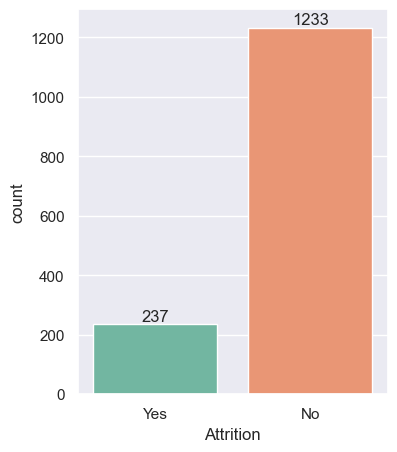

In [104]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(4, 5))
ax= sns.countplot(dataset, x="Attrition", palette = "Set2")
# Show the plot
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<Axes: xlabel='Age', ylabel='count'>

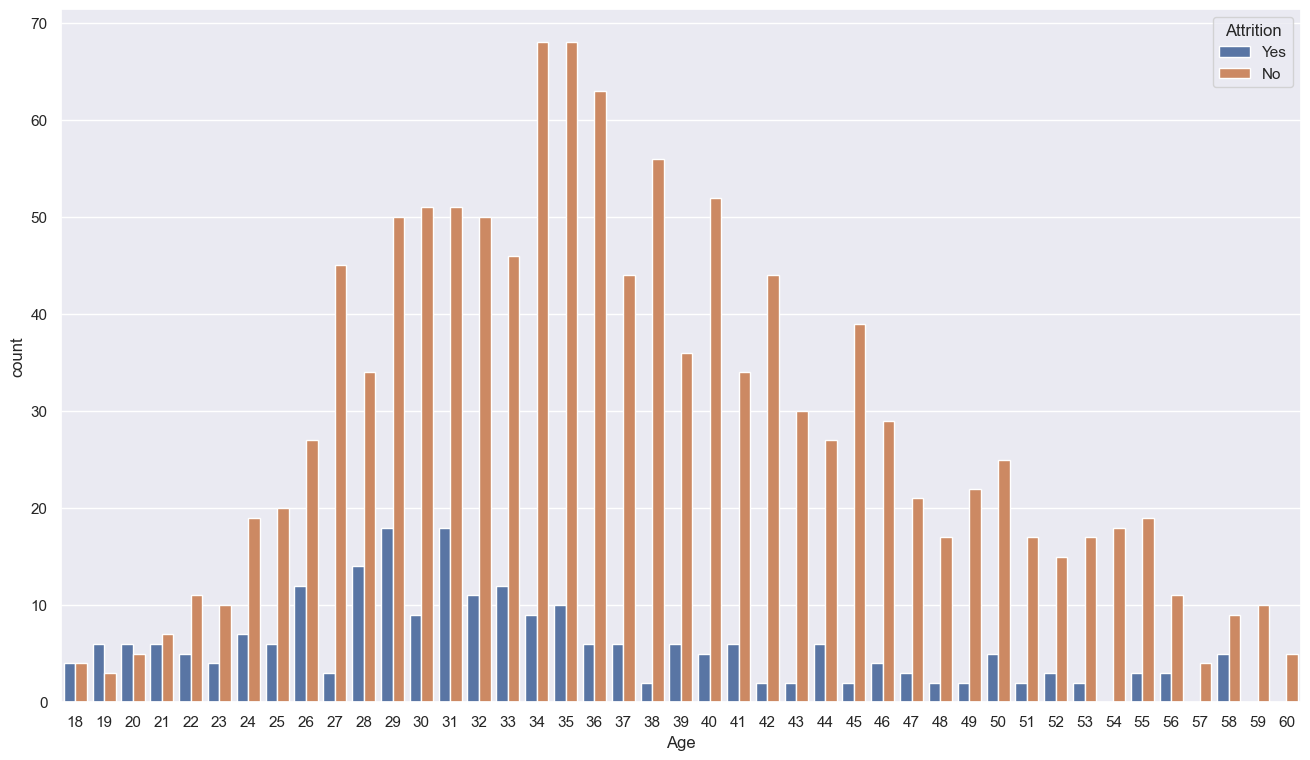

In [105]:
plt.figure(figsize=[16, 9])
sns.countplot(x='Age', hue='Attrition', data=dataset)

In [106]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='JobSatisfaction', ylabel='count'>

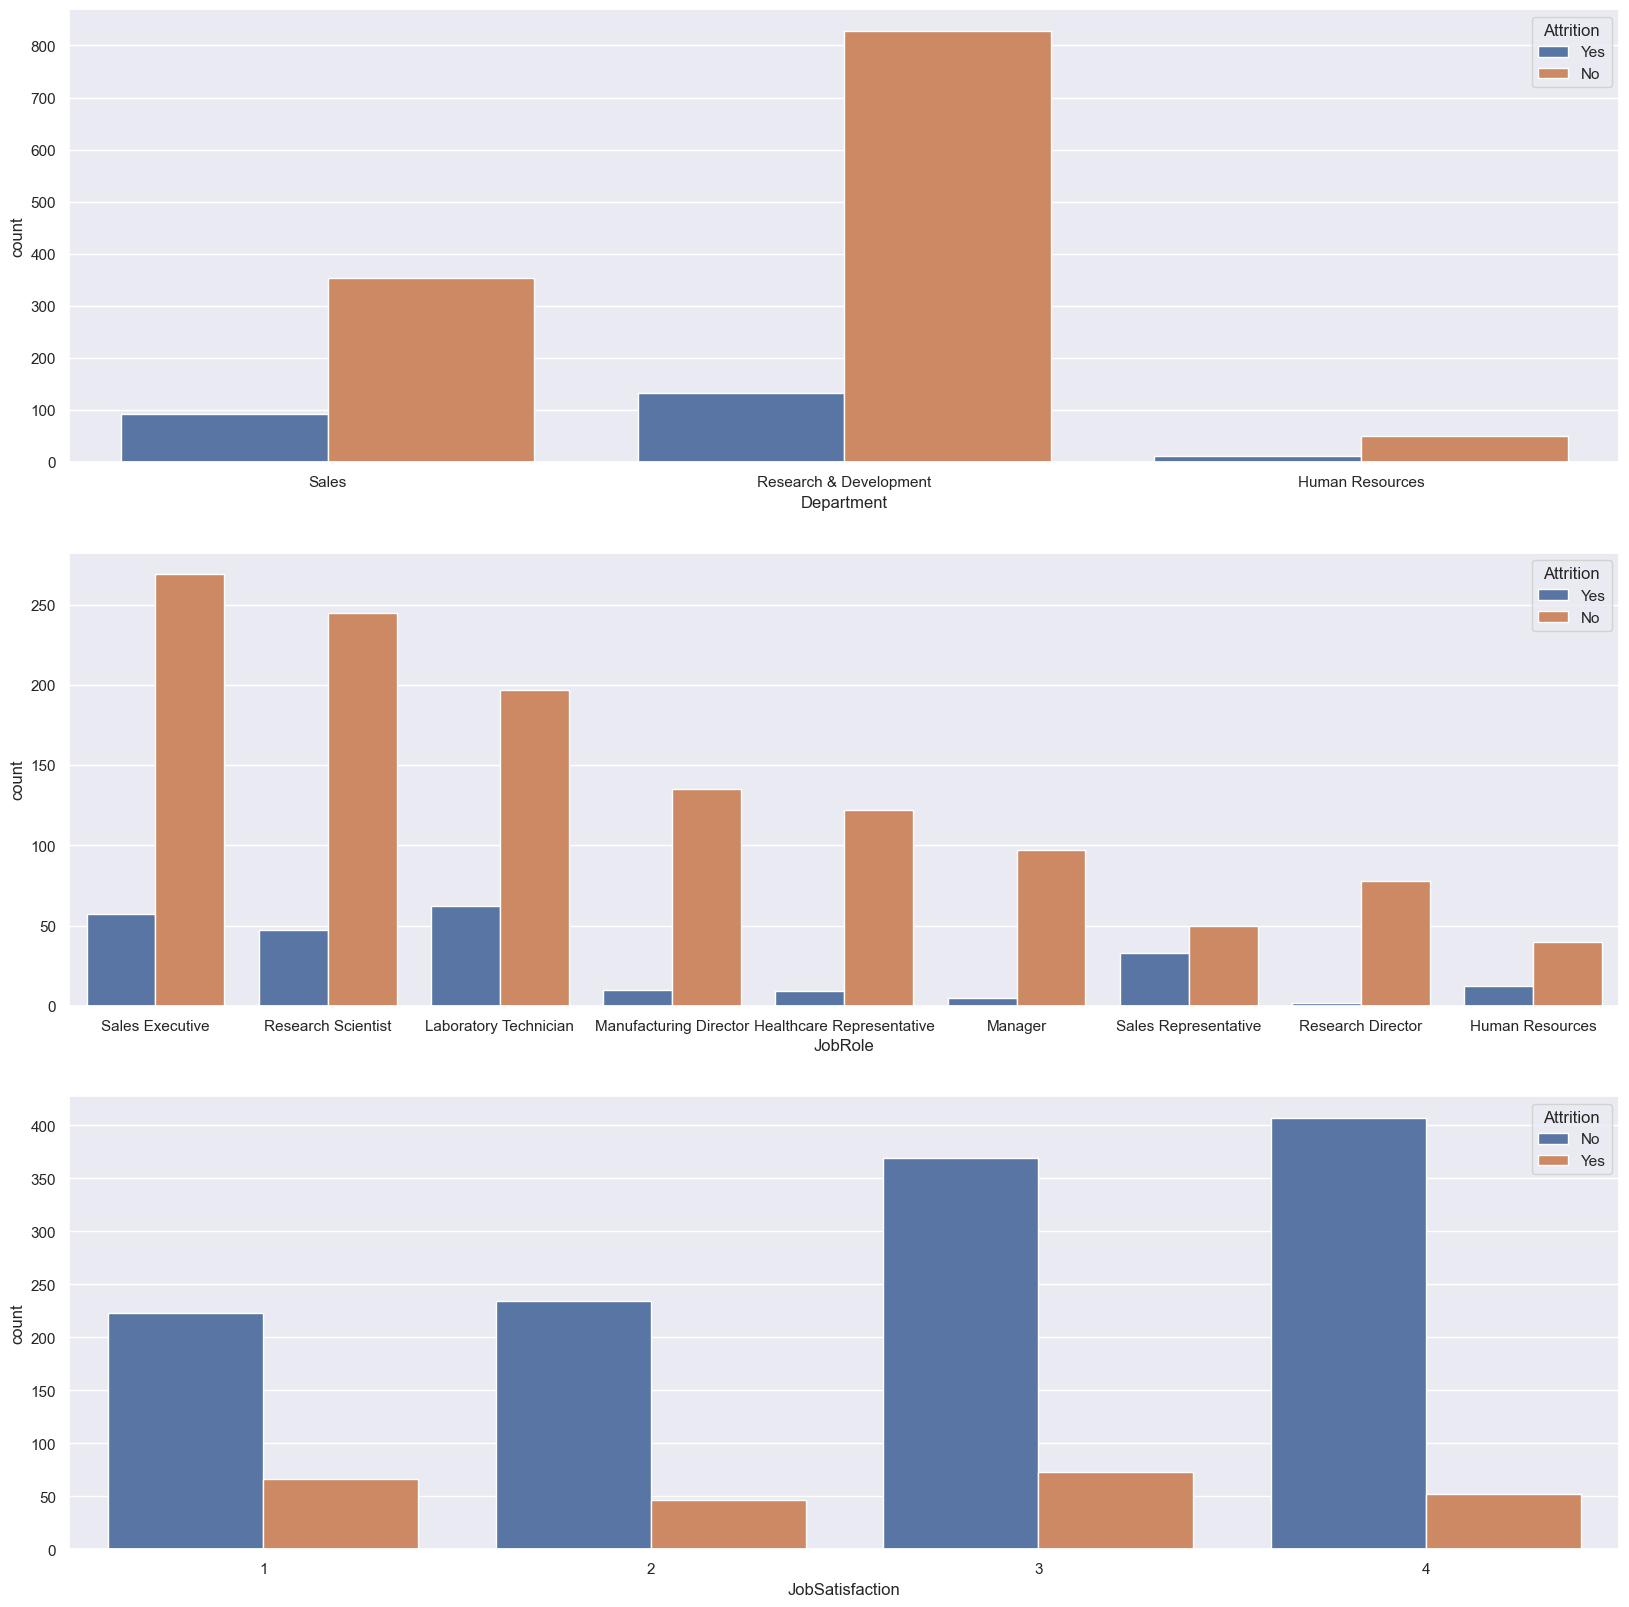

In [107]:
plt.figure(figsize=[20,20])

plt.subplot(311)
sns.countplot(x='Department', hue='Attrition', data=dataset)
plt.subplot(312)
sns.countplot(x='JobRole', hue='Attrition', data=dataset)
plt.subplot(313)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=dataset)

### Correlation matrix and Heatmap

In [108]:
dataset.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [109]:
# Create Correlation Matrix
corr = dataset.select_dtypes(include=['int64']).corr()

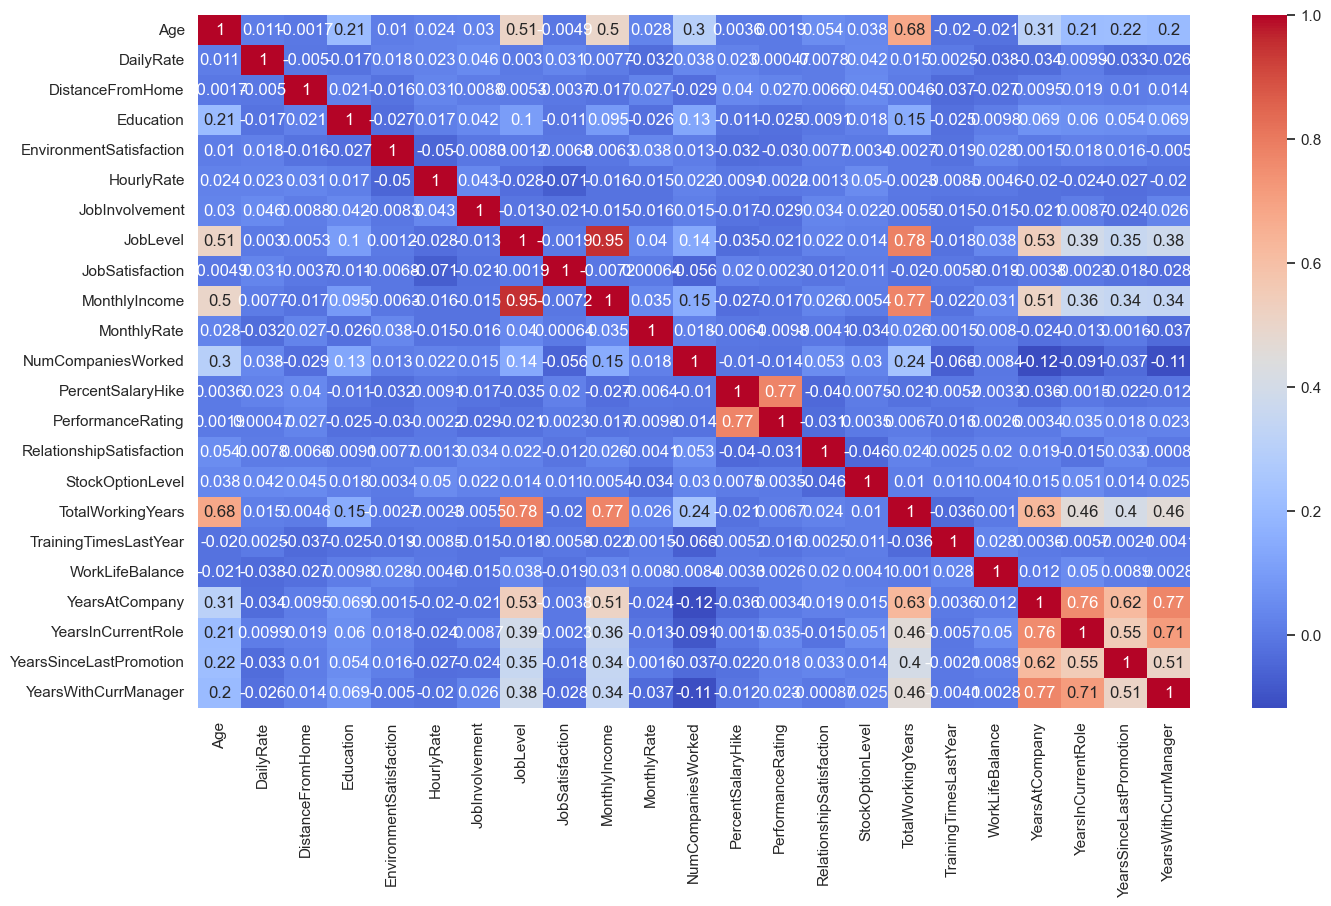

In [110]:
# correlation heatmap
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr, annot=True, cmap = 'coolwarm')

<Axes: >

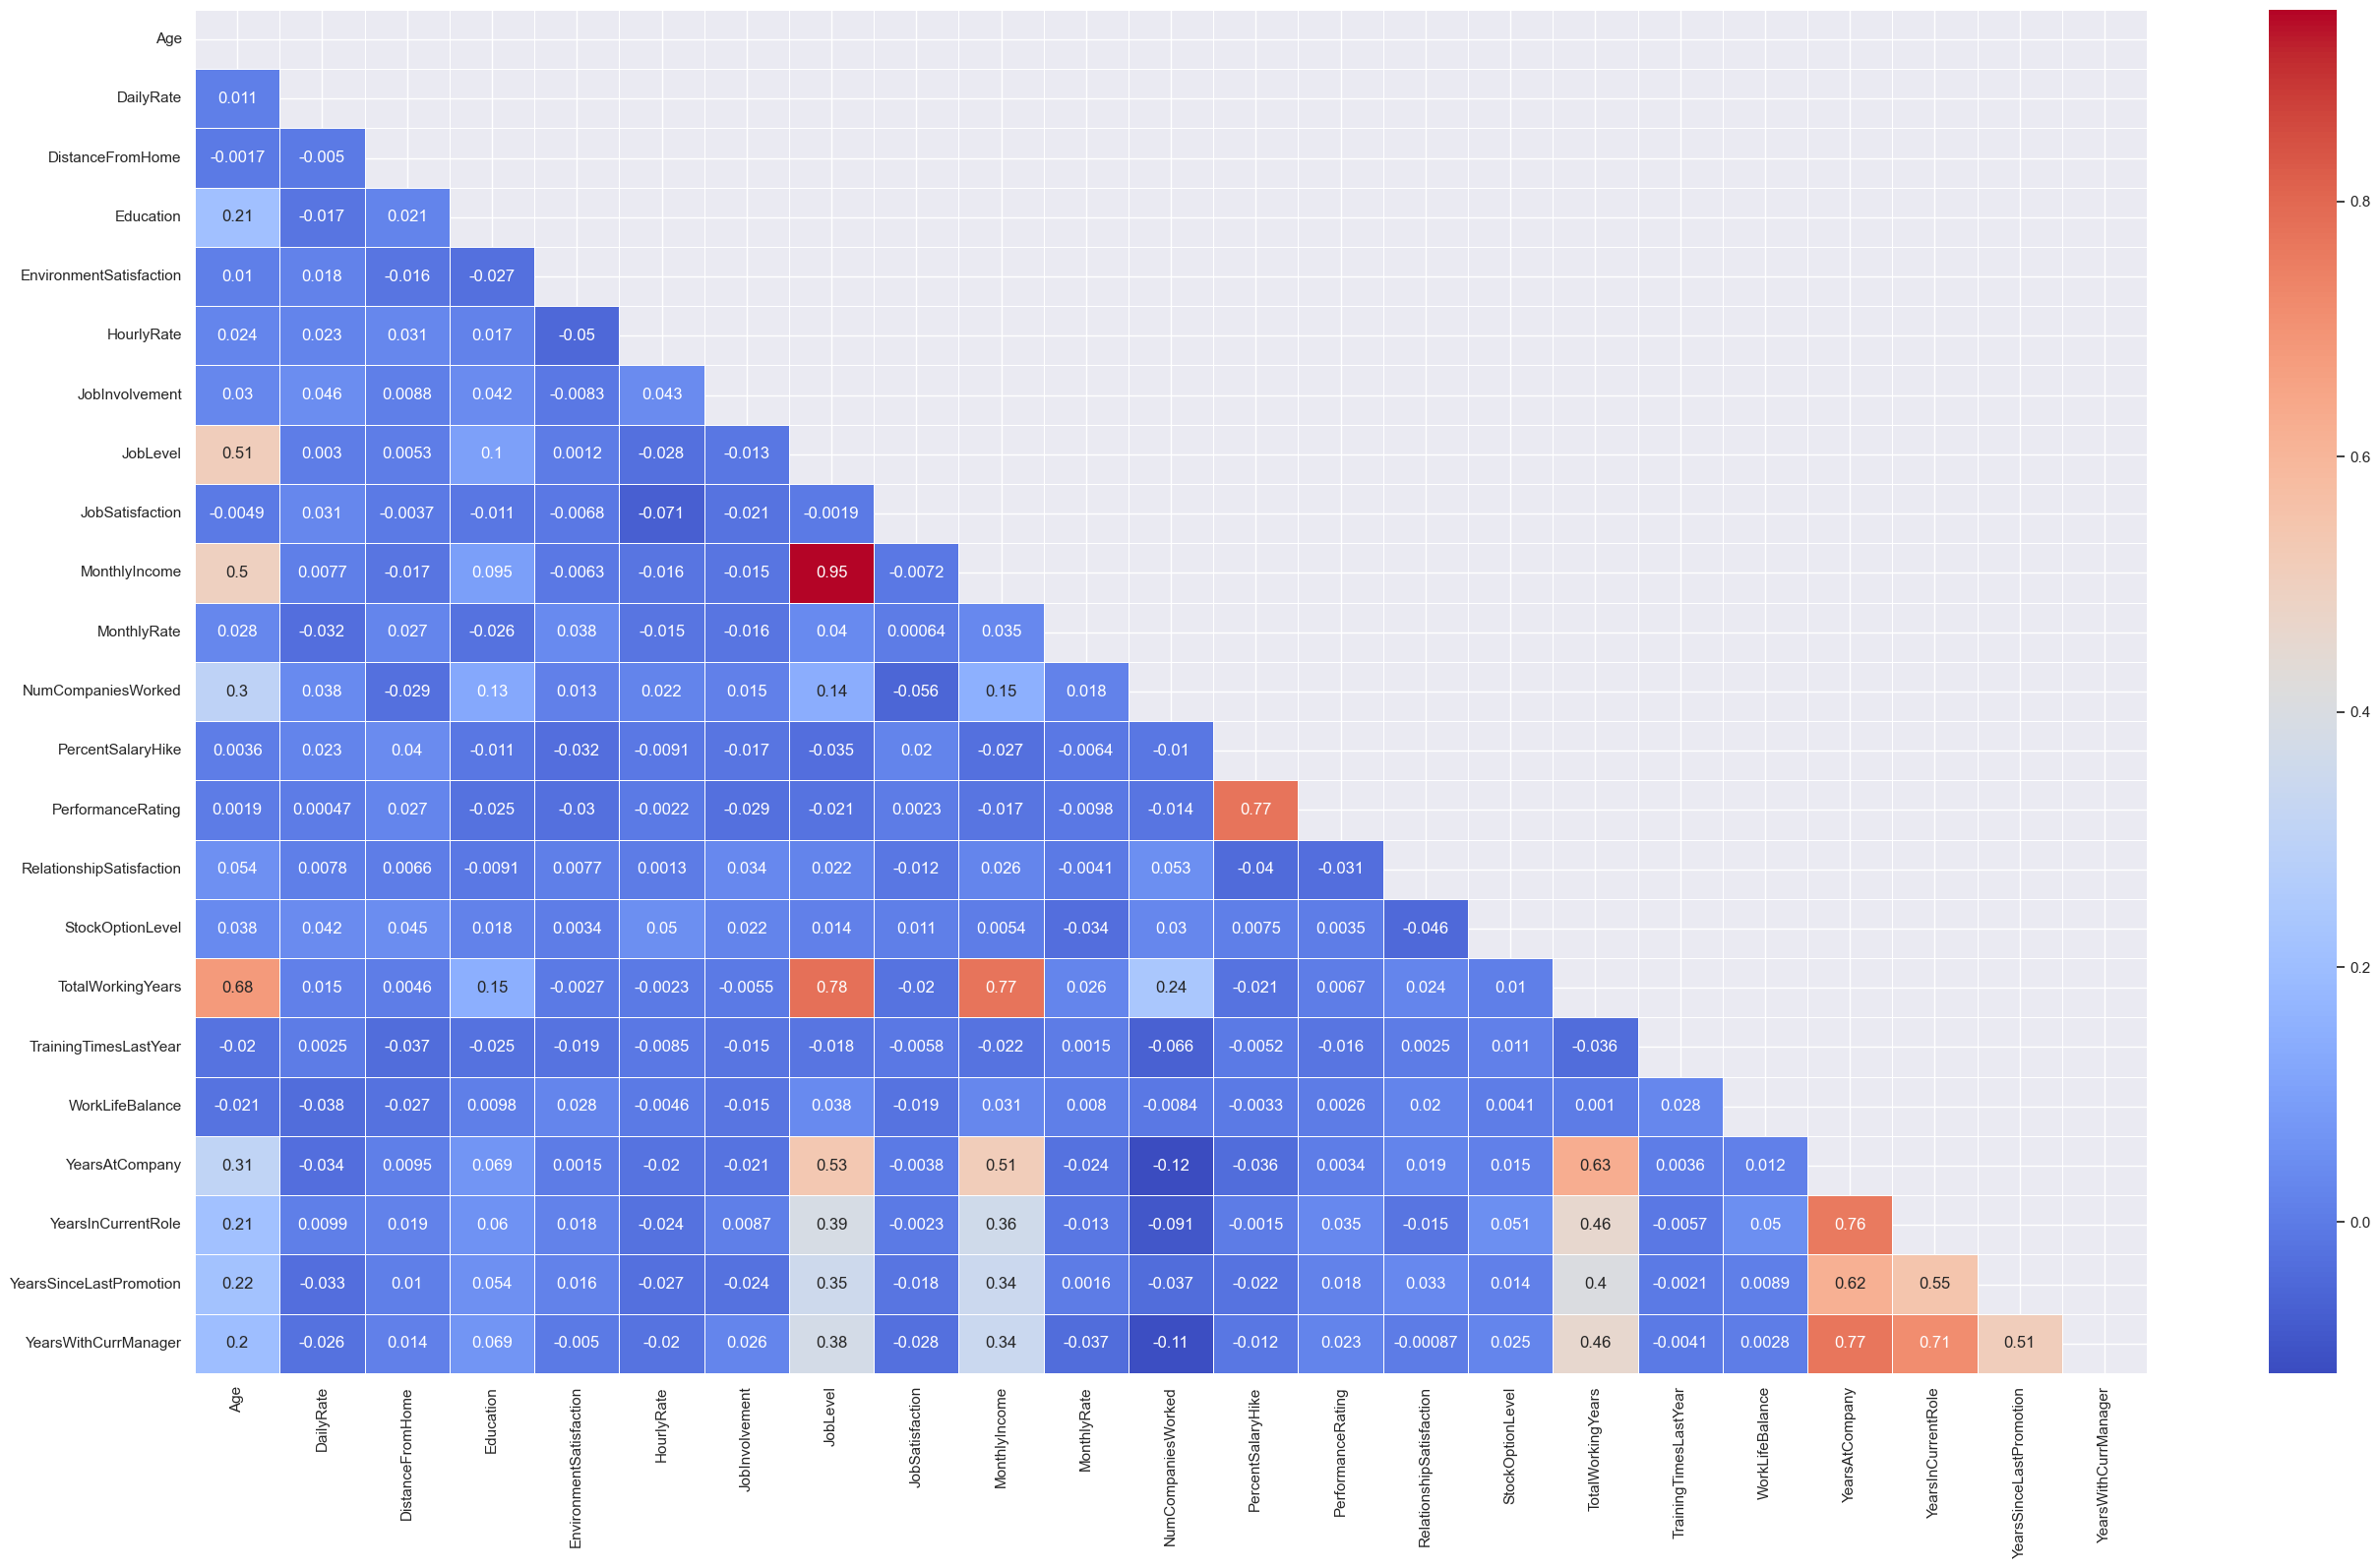

In [111]:
# Set Up Mask To Hide Upper Triangle
plt.figure(figsize=(32,18))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', mask=mask, linewidths=0.5, annot=True)

### Dealing with categorical data

In [112]:
# categorical columns
dataset.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [113]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [114]:
dataset.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   
3                          False            False   
4                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                         False                  False                  True   
3                         False                   True                 False   
4                         False                   True                 False   

   OverTime_Yes  
0          True  
1         False  
2          True  
3          True  
4         False  

[5 rows x 45 columns]

In [115]:
dataset.shape

(1470, 45)

### Split the dataset into train and test set

In [116]:
dataset.rename(columns={"Attrition_Yes": "Attrition"}, inplace=True)

In [117]:
# matrix of features / independent variables#X = dataset.drop(columns='Attrition')

In [118]:
#X.shape

In [119]:
# dependent variable#
y = dataset['Attrition']

In [120]:
#y.shape

In [121]:
'''
# split the dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # Synthetic Minority Oversampling Technique
oversample = SMOTE(random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
columns = X_train.columns

os_data_X, os_data_y = oversample.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['Attrition'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of NO in Attrition",len(os_data_y[os_data_y['Attrition']==0]))
print("Number of YES in Attrition",len(os_data_y[os_data_y['Attrition']==1]))
print("Proportion of NO in oversampled data is ",len(os_data_y[os_data_y['Attrition']==0])/len(os_data_X))
print("Proportion of YES in oversampled data is ",len(os_data_y[os_data_y['Attrition']==1])/len(os_data_X))
'''

'\n# split the dataset\nfrom sklearn.model_selection import train_test_split\nfrom imblearn.over_sampling import SMOTE   # Synthetic Minority Oversampling Technique\noversample = SMOTE(random_state=123)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)\ncolumns = X_train.columns\n\nos_data_X, os_data_y = oversample.fit_resample(X_train, y_train)\nos_data_X = pd.DataFrame(data=os_data_X, columns=columns )\nos_data_y= pd.DataFrame(data=os_data_y, columns=[\'Attrition\'])\n# we can Check the numbers of our data\nprint("length of oversampled data is ",len(os_data_X))\nprint("Number of NO in Attrition",len(os_data_y[os_data_y[\'Attrition\']==0]))\nprint("Number of YES in Attrition",len(os_data_y[os_data_y[\'Attrition\']==1]))\nprint("Proportion of NO in oversampled data is ",len(os_data_y[os_data_y[\'Attrition\']==0])/len(os_data_X))\nprint("Proportion of YES in oversampled data is ",len(os_data_y[os_data_y[\'Attrition\']==1])/len(os_data_X))\n'

### Feature scaling

In [122]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train_scaled = sc.fit_transform(os_data_X)
#X_test_scaled = sc.transform(X_test)

In [123]:
#X_train_scaled

In [124]:
#X_test_scaled

## Building the model

In [125]:
#!pip install h2o
import h2o
from h2o.automl import H2OAutoML
print(f'H2O AutoML version: {h2o.__version__}')

H2O AutoML version: 3.46.0.1


In [126]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from C:\ProgramData\miniconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\simon\AppData\Local\Temp\tmpx6il3hd1
  JVM stdout: C:\Users\simon\AppData\Local\Temp\tmpx6il3hd1\h2o_simon_started_from_python.out
  JVM stderr: C:\Users\simon\AppData\Local\Temp\tmpx6il3hd1\h2o_simon_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/Los_Angeles
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    1 month and 1 day
H2O_cluster_name:           H2O_from_python_simon_7m519s
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    11.98 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.13 final
--------------------------  -----------------------------

In [127]:
dataset_h = h2o.H2OFrame(dataset)
train_h, test_h = dataset_h.split_frame(ratios=[0.8], seed = 123)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [128]:
# Pandas DataFrames should be converted to H2O dataframes before calling H2OAutoML().
#X_y_train_h = h2o.H2OFrame(pd.concat([os_data_X, os_data_y], axis=columns))
#X_y_train_h['Attrition'] = X_y_train_h['Attrition'].asfactor()
#X_test_h = h2o.H2OFrame(X_test)

In [129]:
aml = H2OAutoML(max_runtime_secs=(3600 * 8),  # 8 hours
    max_models=25,
    #verbosity="debug",
    nfolds=10,
    balance_classes=True,  class_sampling_factors=[0.5,1.25],  # undersample the majority class, and oversample the minority class
    stopping_metric = "AUCPR", sort_metric = "AUCPR",
    seed=18)
%time aml.train(y = 'Attrition', training_frame = train_h)

AutoML progress: |
12:19:56.562: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: total: 2.53 s
Wall time: 9min 47s


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       2/5
# GBM base models (used / total)           1/1
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  0/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         10
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0564338567441598
RMSE: 0.23755811235181973
LogLoss: 0.20628436401050923
AUC: 0.9571484867591425
AUCPR: 0.8803562171276786
Gini: 0.9142969735182851
Null degrees of freedom: 1170
Residual degrees of freedom: 1168
Null deviance: 1054.6777010276408
Residual deviance: 483.1179805126126
AIC: 489.1179805126126

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42316050780561393
       False    True    Error    Rate
-----  -------  ------  -------  -------------
False  955      21      0.0215   (21.0/976.0)
True   52       143     0.2667   (52.0/195.0)
Total  1007     164     0.0623   (73.0/1171.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.423161     0.796657  124
max f2                       0.219776     0.826291  195
max f0point5                 0.535465     0.869873  93
max accuracy                 0.461113     0.940222  112
max precision                0.966296     1         0
max recall                   0.0448656    1         338
max specificity              0.966296     1         0
max absolute_mcc             0.461113     0.771688  112
max min_per_class_accuracy   0.225046     0.889344  193
max mean_per_class_accuracy  0.219776     0.895442  195
max tns                      0.966296     976       0
max fns                      0.966296     194       0
max fps                      0.000930926  976       399
max tps                      0.0448656    195       338
max tnr                      0.966296     1         0
max fnr                      0.966296     0.994872  0
max fpr                      0.000930926  1         399
max tpr                      0.0448656    1         338

Gains/Lift Table: Avg response rate: 16.65 %, avg score: 17.83 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102477                   0.896175           6.00513    6.00513            1                0.922145    1                           0.922145            0.0615385       0.0615385                  500.513   500.513            0.0615385
2        0.0204953                   0.859797           6.00513    6.00513            1                0.875428    1                           0.898787            0.0615385       0.123077                   500.513   500.513            0.123077
3        0.030743                    0.823707           6.00513    6.00513            1                0.83905     1                           0.878874            0.0615385       0.184615                   500.513   500.513            0.184615
4        0.0401366                

In [130]:
# print the leaderboard, and check out the results.
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                    aucpr       auc    logloss    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  --------  ---------  ----------------------  --------  ---------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956  0.662643  0.831184   0.323337                0.242021  0.303727  0.09225
StackedEnsemble_AllModels_1_AutoML_1_20240415_121956     0.659221  0.827165   0.3229                  0.240991  0.303421  0.0920643
GLM_1_AutoML_1_20240415_121956                           0.646673  0.826127   0.331812                0.239949  0.30848   0.0951601
GBM_2_AutoML_1_20240415_121956                           0.591263  0.808325   0.349308                0.276886  0.319024  0.101776
GBM_grid_1_AutoML_1_20240415_121956_model_7              0.58371   0.806988   0.350862                0.273295  0.323659  0.104755
GBM_1_AutoML_1_20240415_121956                           0.578053  0.799241   0.365189                0.278938  0.330636  0.10932
GBM_grid_1_AutoML_1_20240415_121956_model_6              0.564047  0.809137   0.354612                0.271222  0.327404  0.107193
GBM_4_AutoML_1_20240415_121956                           0.56118   0.805751   0.359859                0.255835  0.322215  0.103822
DeepLearning_1_AutoML_1_20240415_121956                  0.545154  0.787815   0.386882                0.284053  0.336095  0.11296
GBM_grid_1_AutoML_1_20240415_121956_model_1              0.540973  0.788766   0.371961                0.295823  0.33575   0.112728
DeepLearning_grid_3_AutoML_1_20240415_121956_model_1     0.5294    0.787897   0.410004                0.279947  0.333992  0.111551
GBM_grid_1_AutoML_1_20240415_121956_model_4              0.527729  0.788753   0.373467                0.286121  0.330294  0.109094
DeepLearning_grid_2_AutoML_1_20240415_121956_model_1     0.520565  0.770505   0.465311                0.283507  0.354205  0.125462
DeepLearning_grid_2_AutoML_1_20240415_121956_model_2     0.511448  0.765306   0.547151                0.309185  0.3685    0.135792
GBM_5_AutoML_1_20240415_121956                           0.510256  0.773253   0.381254                0.291215  0.333886  0.11148
GBM_3_AutoML_1_20240415_121956                           0.509806  0.778447   0.374141                0.293282  0.332421  0.110504
GBM_grid_1_AutoML_1_20240415_121956_model_5              0.505314  0.775938   0.449938                0.275297  0.342514  0.117316
DeepLearning_grid_3_AutoML_1_20240415_121956_model_2     0.499591  0.779863   0.450969                0.277378  0.343494  0.117988
DeepLearning_grid_1_AutoML_1_20240415_121956_model_2     0.496939  0.74901    0.560101                0.280459  0.355908  0.12667
GBM_grid_1_AutoML_1_20240415_121956_model_2              0.482867  0.776025   0.432366                0.279931  0.348091  0.121167
GBM_grid_1_AutoML_1_20240415_121956_model_3              0.481274  0.769449   0.431718                0.279414  0.348812  0.12167
DeepLearning_grid_3_AutoML_1_20240415_121956_model_3     0.472634  0.764696   1.14085                 0.284035  0.380808  0.145015
XRT_1_AutoML_1_20240415_121956                           0.463584  0.751558   0.390701                0.322013  0.34516   0.119136
DRF_1_AutoML_1_20240415_121956                           0.463046  0.763885   0.410684                0.307112  0.341748  0.116792
DeepLearning_grid_1_AutoML_1_20240415_121956_model_1     0.462549  0.757219   0.72894                 0.284539  0.382529  0.146329
DeepLearning_grid_1_AutoML_1_20240415_121956_model_3     0.450655  0.735272   1.06916                 0.290185  0.377853  0.142773
DeepLearning_grid_2_AutoML_1_20240415_121956_model_3     0.450594  0.742943   1.20557                 0.288622  0.400591  0.160473
[27 rows x 7 columns]

In [131]:
pred = aml.predict(test_h)
pred.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict        False       True
---------  ---------  ---------
False      0.833951   0.166049
False      0.953841   0.0461589
True       0.0951922  0.904808
False      0.960378   0.0396225
False      0.827656   0.172344
False      0.957965   0.0420346
False      0.916825   0.0831749
False      0.70168    0.29832
True       0.607707   0.392293
False      0.983098   0.0169017
[10 rows x 3 columns]

### Save models

In [132]:
%%time

model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
out_path = "./h2o-automl-saved-models-classif/"
for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)

h2o.export_file(lb, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
CPU times: total: 312 ms
Wall time: 1.3 s


In [133]:
lb = h2o.import_file(path=os.path.join(out_path, "aml_leaderboard.h2o"))

lb.head(rows=10)
#lb.head(rows=lb.nrows)
# ^ to see the entire leaderboard

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id                                                    aucpr       auc    logloss    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  --------  ---------  ----------------------  --------  ---------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956  0.662643  0.831184   0.323337                0.242021  0.303727  0.09225
StackedEnsemble_AllModels_1_AutoML_1_20240415_121956     0.659221  0.827165   0.3229                  0.240991  0.303421  0.0920643
GLM_1_AutoML_1_20240415_121956                           0.646673  0.826127   0.331812                0.239949  0.30848   0.0951601
GBM_2_AutoML_1_20240415_121956                           0.591263  0.808325   0.349308                0.276886  0.319024  0.101776
GBM_grid_1_AutoML_1_20240415_121956_model_7              0.58371   0.806988   0.350862                0.273295  0.323659  0.104755
GBM_1_AutoML_1_20240415_121956                           0.578053  0.799241   0.365189                0.278938  0.330636  0.10932
GBM_grid_1_AutoML_1_20240415_121956_model_6              0.564047  0.809137   0.354612                0.271222  0.327404  0.107193
GBM_4_AutoML_1_20240415_121956                           0.56118   0.805751   0.359859                0.255835  0.322215  0.103822
DeepLearning_1_AutoML_1_20240415_121956                  0.545154  0.787815   0.386882                0.284053  0.336095  0.11296
GBM_grid_1_AutoML_1_20240415_121956_model_1              0.540973  0.788766   0.371961                0.295823  0.33575   0.112728
[10 rows x 7 columns]

## StackedEnsemble_BestOfFamily is the leader, StackedEnsemble_AllModels is usually at the 2nd place.
### Let's look inside the StackedEnsemble_BestOfFamily. It is an ensemble of all of the individual models in the AutoML run. 

In [134]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
se_best = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se_best.metalearner().model_id)
metalearner.coef()

{'Intercept': 0.3270333723692773,
 'GLM_1_AutoML_1_20240415_121956': 0.6277167428272974,
 'GBM_2_AutoML_1_20240415_121956': 0.4558792508410826,
 'DeepLearning_1_AutoML_1_20240415_121956': 0.0,
 'XRT_1_AutoML_1_20240415_121956': 0.0,
 'DRF_1_AutoML_1_20240415_121956': 0.0}

### Examine the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble

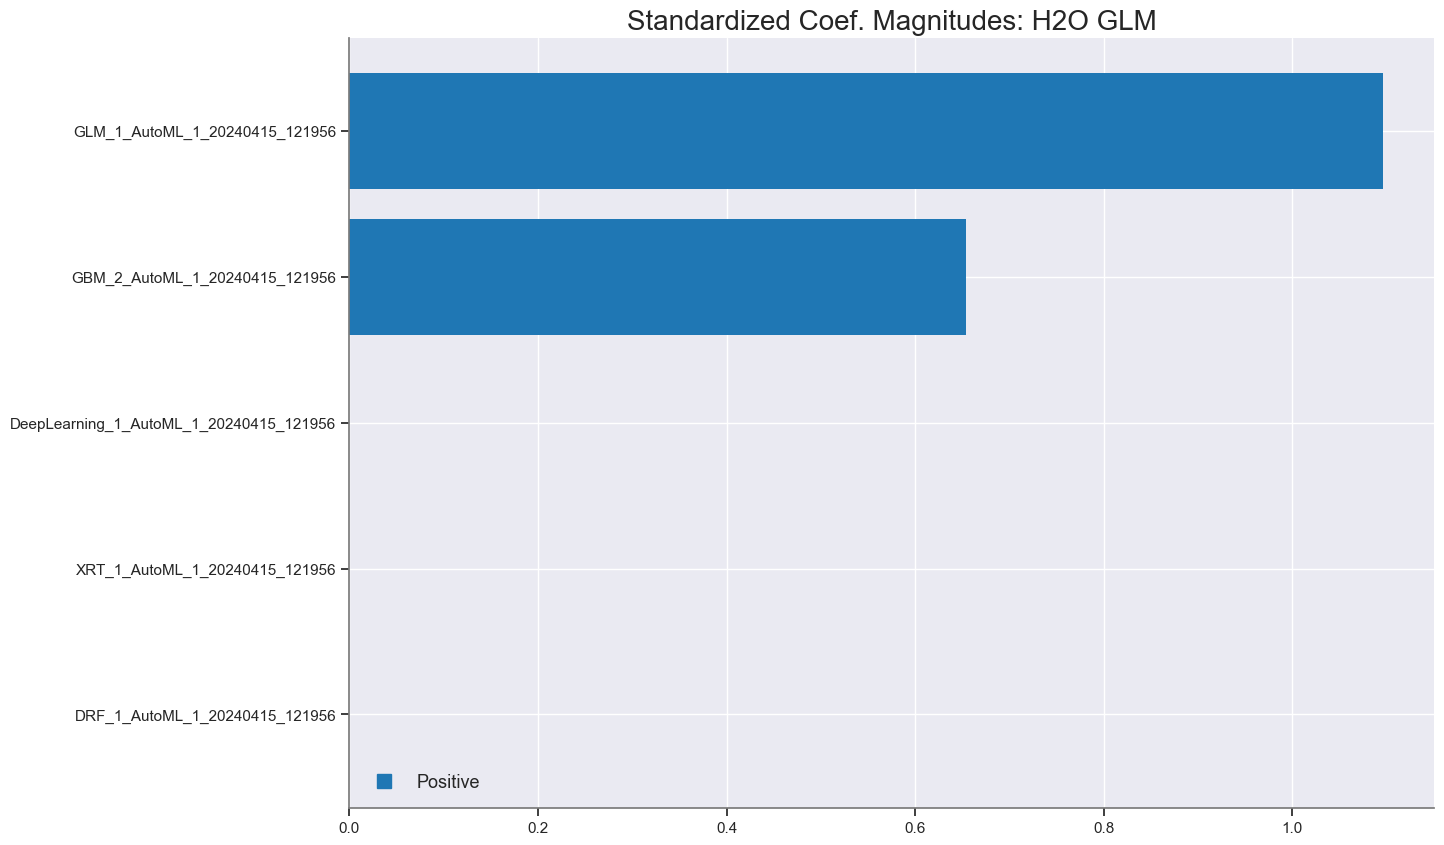

In [135]:
metalearner.std_coef_plot()

## Most important model used in our Stacked Ensemble is Generalized Linear Model (GLM) and Gradient Boosting Machine (GBM)

### reproduce the result (auc) of a few best individual models.

In [136]:
# Get a specific model by model ID
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
m_glm = h2o.get_model([mid for mid in model_ids if "GLM_1_AutoML" in mid][0])

excluded_params = ['model_id', 'response_column', 'training_frame','ignored_columns', 'lambda']
m_glm_actual_params = {k: v['actual'] for k, v in m_glm.params.items() if k not in excluded_params}

reprod_model_glm = H2OGeneralizedLinearEstimator(**m_glm_actual_params)
reprod_model_glm.train(
    y = 'Attrition', training_frame = train_h
)
reprod_model_glm.auc(xval=True)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


0.8261270491803279

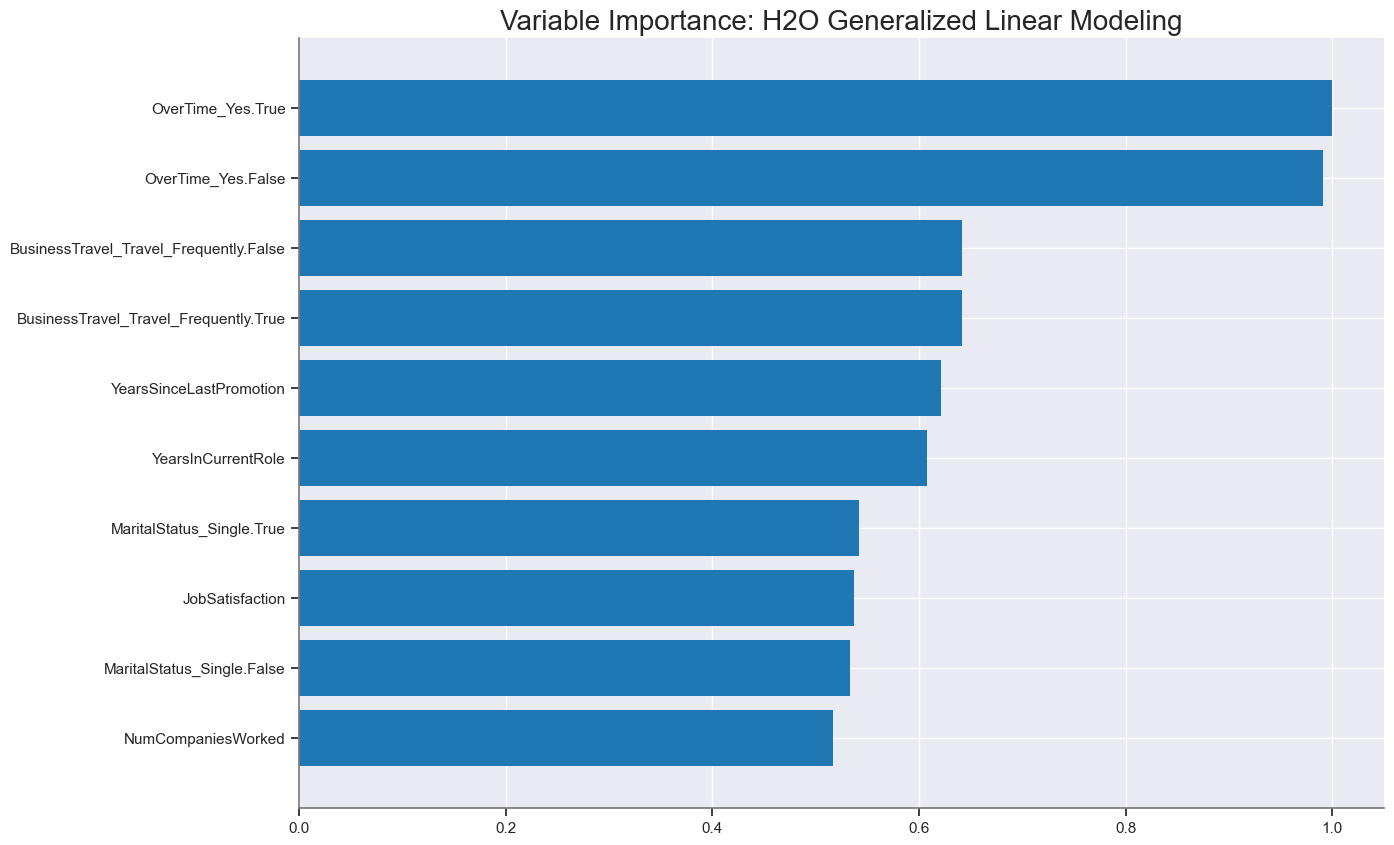

<Figure size 640x480 with 0 Axes>

In [146]:
m_glm.varimp_plot()

In [137]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
m_gbm = h2o.get_model([mid for mid in model_ids if "GBM_2_AutoML" in mid][0])

excluded_params = ['model_id', 'response_column', 'training_frame','ignored_columns']
m_gbm_actual_params = {k: v['actual'] for k, v in m_gbm.params.items() if k not in excluded_params}

reprod_model_gbm = H2OGradientBoostingEstimator(**m_gbm_actual_params)
reprod_model_gbm.train(
    y='Attrition',
    training_frame=train_h
)
reprod_model_gbm.auc(xval=True)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


0.8029502942412778

In [147]:
m_gbm.varimp_plot()

<Figure size 640x480 with 0 Axes>

In [138]:
# how  best model performs on our test set.
aml.leader.model_performance(test_data=test_h)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08651688417637711
RMSE: 0.2941375259574628
LogLoss: 0.2941921420391705
AUC: 0.8567722808967946
AUCPR: 0.6049919482331272
Gini: 0.7135445617935892
Null degrees of freedom: 298
Residual degrees of freedom: 296
Null deviance: 244.20505909575203
Residual deviance: 175.92690093942392
AIC: 181.92690093942392

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27136144852032934
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  224      33      0.1284   (33.0/257.0)
True   12       30      0.2857   (12.0/42.0)
Total  236      63      0.1505   (45.0/299.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.271361     0.571429  62
max f2                       0.234807     0.67623   75
max f0point5                 0.672465     0.614035  17
max accuracy                 0.672465     0.892977  17
max precision                0.967101     1         0
max recall                   0.0143006    1         273
max specificity              0.967101     1         0
max absolute_mcc             0.271361     0.4992    62
max min_per_class_accuracy   0.219376     0.805447  83
max mean_per_class_accuracy  0.234807     0.8092    75
max tns                      0.967101     257       0
max fns                      0.967101     41        0
max fps                      0.00354361   257       298
max tps                      0.0143006    42        273
max tnr                      0.967101     1         0
max fnr                      0.967101     0.97619   0
max fpr                      0.00354361   1         298
max tpr                      0.0143006    1         273

Gains/Lift Table: Avg response rate: 14.05 %, avg score: 18.07 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100334                   0.893102           7.11905   7.11905            1                0.933465    1                           0.933465            0.0714286       0.0714286                  611.905   611.905            0.0714286
2        0.0200669                   0.821818           7.11905   7.11905            1                0.864505    1                           0.898985            0.0714286       0.142857                   611.905   611.905            0.142857
3        0.0301003                   0.766394           4.74603   6.32804            0.666667         0.804796    0.888889                    0.867589            0.047619        0.190476                   374.603   532.804            0.186585
4        0.0401338                   0.738              4.74603   5.93254            0.666667         0.765286    0.833333                    0.842013            0.047619        0.238095                   374.603   493.254            0.230313
5        0.0501672                   0.71125            2.37302   5.22063            0.333333         0.733669    0.733333                    0.820344            0.0238095       0.261905                   137.302   422.063            0.246341
6        0.100334                    0.457587           3.32222   4.27143            0.466667         0.581379    0.6                         0.700862            0.166667        0.428571                   232.222   327.143            0.381879
7        0.150502                    0.366064           2.37302   3.63862            0.333333         0.415377    0.511111

###  *Model AUC is 0.958 on traning, 0.831 on cross-validation data, and 0.857 on test data*

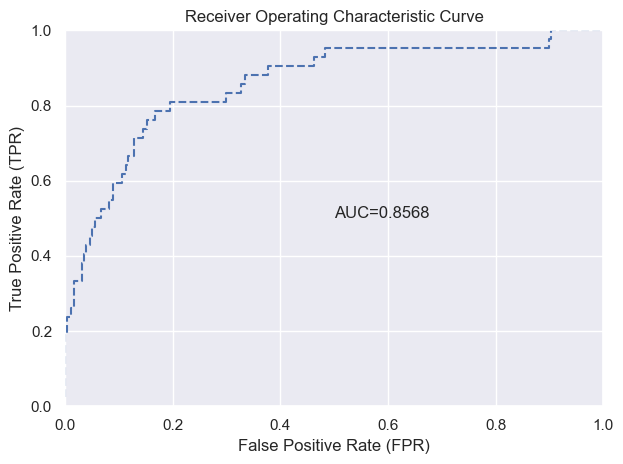

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0038910505836575876,
  0.0038910505836575876,
  0.0038910505836575876,
  0.007782101167315175,
  0.011673151750972763,
  0.011673151750972763,
  0.01556420233463035,
  0.01556420233463035,
  0.01556420233463035,
  0.01556420233463035,
  0.019455252918287938,
  0.023346303501945526,
  0.027237354085603113,
  0.0311284046692607,
  0.0311284046692607,
  0.0311284046692607,
  0.03501945525291829,
  0.03501945525291829,
  0.038910505836575876,
  0.038910505836575876,
  0.042801556420233464,
  0.04669260700389105,
  0.04669260700389105,
  0.05058365758754864,
  0.05058365758754864,
  0.054474708171206226,
  0.054474708171206226,
  0.058365758754863814,
  0.0622568093385214,
  0.06614785992217899,
  0.06614785992217899,
  0.07003891050583658,
  0.07392996108949416,
  0.07782101167315175,
  0.08171206225680934,
  0.08171206225680934,
  0.08560311284046693,
  0.08949416342412451,
  0.08949416342412451,
  0.08949416342412451,
  0.093385

In [139]:
# plot ROC curve on test data
aml.leader.model_performance(test_data=test_h).plot()

In [140]:
m = aml.get_best_model()
m

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       2/5
# GBM base models (used / total)           1/1
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  0/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         10
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0564338567441598
RMSE: 0.23755811235181973
LogLoss: 0.20628436401050923
AUC: 0.9571484867591425
AUCPR: 0.8803562171276786
Gini: 0.9142969735182851
Null degrees of freedom: 1170
Residual degrees of freedom: 1168
Null deviance: 1054.6777010276408
Residual deviance: 483.1179805126126
AIC: 489.1179805126126

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42316050780561393
       False    True    Error    Rate
-----  -------  ------  -------  -------------
False  955      21      0.0215   (21.0/976.0)
True   52       143     0.2667   (52.0/195.0)
Total  1007     164     0.0623   (73.0/1171.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.423161     0.796657  124
max f2                       0.219776     0.826291  195
max f0point5                 0.535465     0.869873  93
max accuracy                 0.461113     0.940222  112
max precision                0.966296     1         0
max recall                   0.0448656    1         338
max specificity              0.966296     1         0
max absolute_mcc             0.461113     0.771688  112
max min_per_class_accuracy   0.225046     0.889344  193
max mean_per_class_accuracy  0.219776     0.895442  195
max tns                      0.966296     976       0
max fns                      0.966296     194       0
max fps                      0.000930926  976       399
max tps                      0.0448656    195       338
max tnr                      0.966296     1         0
max fnr                      0.966296     0.994872  0
max fpr                      0.000930926  1         399
max tpr                      0.0448656    1         338

Gains/Lift Table: Avg response rate: 16.65 %, avg score: 17.83 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102477                   0.896175           6.00513    6.00513            1                0.922145    1                           0.922145            0.0615385       0.0615385                  500.513   500.513            0.0615385
2        0.0204953                   0.859797           6.00513    6.00513            1                0.875428    1                           0.898787            0.0615385       0.123077                   500.513   500.513            0.123077
3        0.030743                    0.823707           6.00513    6.00513            1                0.83905     1                           0.878874            0.0615385       0.184615                   500.513   500.513            0.184615
4        0.0401366                

## Explainability

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956  0.856772   0.294192  0.604992                0.207059  0.294138  0.0865169                1097                   0.025756  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240415_121956     0.843895   0.299999  0.584381                0.247128  0.299658  0.0897948                1548                   0.072728  StackedEnsemble
GBM_3_AutoML_1_20240415_121956                           0.841486   0.29803   0.572681                0.252965  0.298238  0.0889459                 155                   0.016582  GBM
GLM_1_AutoML_1_20240415_121956                           0.839726   0.307927  0.562022                0.285251  0.299689  0.0898134                 147                   0.01055   GLM
GBM_5_AutoML_1_20240415_121956                           0.837966   0.307437  0.51281                 0.224801  0.305906  0.0935783                 133                   0.01707   GBM
GBM_grid_1_AutoML_1_20240415_121956_model_5              0.835927   0.327351  0.552024                0.209005  0.301988  0.0911965                 486                   0.025744  GBM
GBM_2_AutoML_1_20240415_121956                           0.835279   0.298917  0.570401                0.234992  0.29807   0.0888458                 183                   0.014827  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_6              0.834445   0.309471  0.556373                0.277006  0.30144   0.0908662                  83                   0.01478   GBM
GBM_grid_1_AutoML_1_20240415_121956_model_7              0.830554   0.310304  0.539804                0.317074  0.303202  0.0919317                  86                   0.014709  GBM
GBM_1_AutoML_1_20240415_121956                           0.829072   0.314094  0.579394                0.236937  0.301627  0.0909787                 233                   0.015001  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_2              0.828331   0.346509  0.477041                0.266815  0.319806  0.102276                  295                   0.022815  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_4              0.819344   0.310612  0.529634                0.246896  0.303009  0.0918143                 181                   0.018846  GBM
GBM_4_AutoML_1_20240415_121956                           0.814249   0.321036  0.480813                0.268529  0.311379  0.0969566                 247                   0.016483  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_1              0.814249   0.326341  0.552826                0.226283  0.30878   0.0953451                 107                   0.012931  GBM
DeepLearning_grid_1_AutoML_1_20240415_121956_model_3     0.797943   1.16777   0.52274                 0.27506   0.405577  0.164493                  709                   0.021974  DeepLearning
GBM_grid_1_AutoML_1_20240415_121956_model_3              0.796554   0.36098   0.440532                0.298638  0.323666  0.10476                   316                   0.018672  GBM
XRT_1_AutoML_1_20240415_121956                           0.793728   0.345597  0.442514                0.32657   0.320713  0.102857                  200                   0.018895  DRF
DeepLearning_1_AutoML_1_20240415_121956                  0.793682   0.39459   0.496699                0.246665  0.347121  0.120493                  144                   0.013576  DeepLearning
DeepLearning_grid_1_AutoML_1_20240415_121956_model_2     0.790995   0.757195  0.519271                0.302992  0.395527  0.156442                 4199                   0.013547  DeepLearning
DeepLearning_grid_2_AutoML_1_20240415_121956_model_3     0.788864   1.75

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27136144852032934
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  224      33      0.1284   (33.0/257.0)
True   12       30      0.2857   (12.0/42.0)
Total  236      63      0.1505   (45.0/299.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

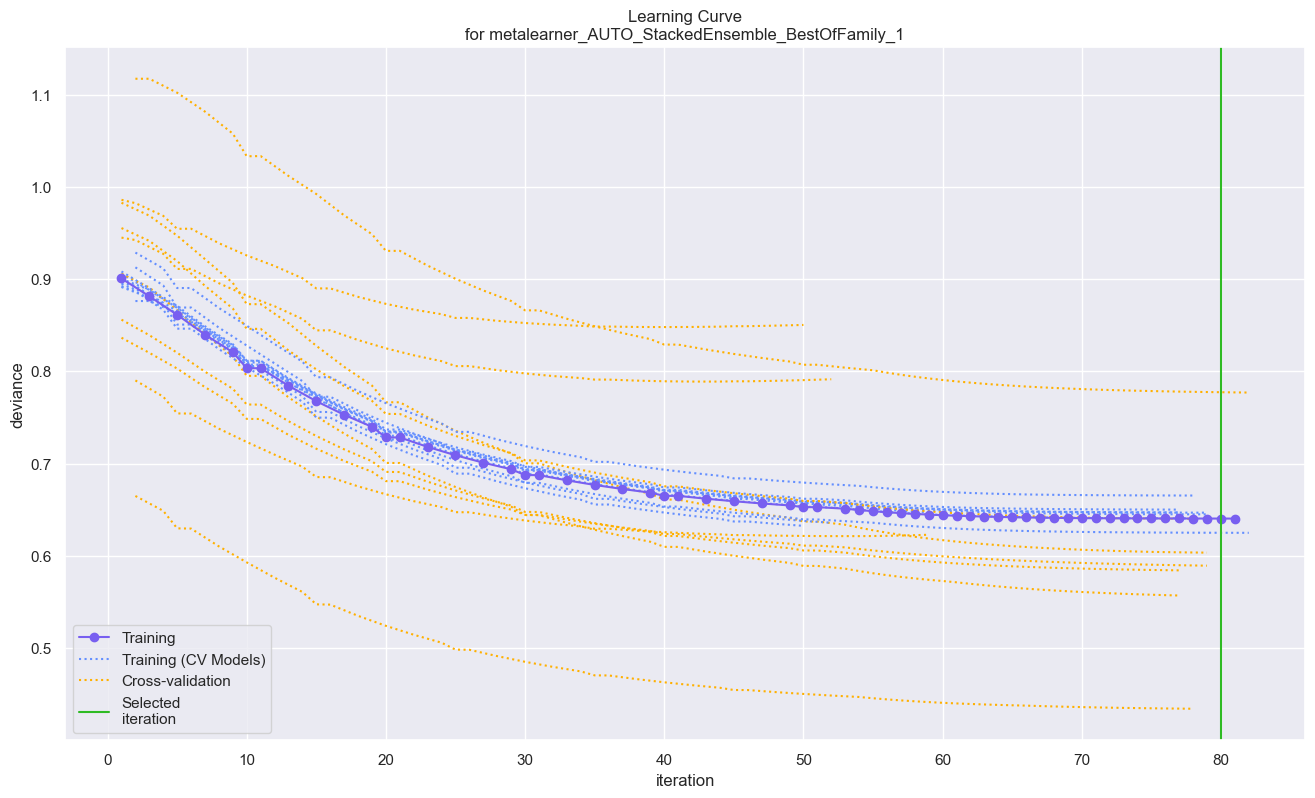

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

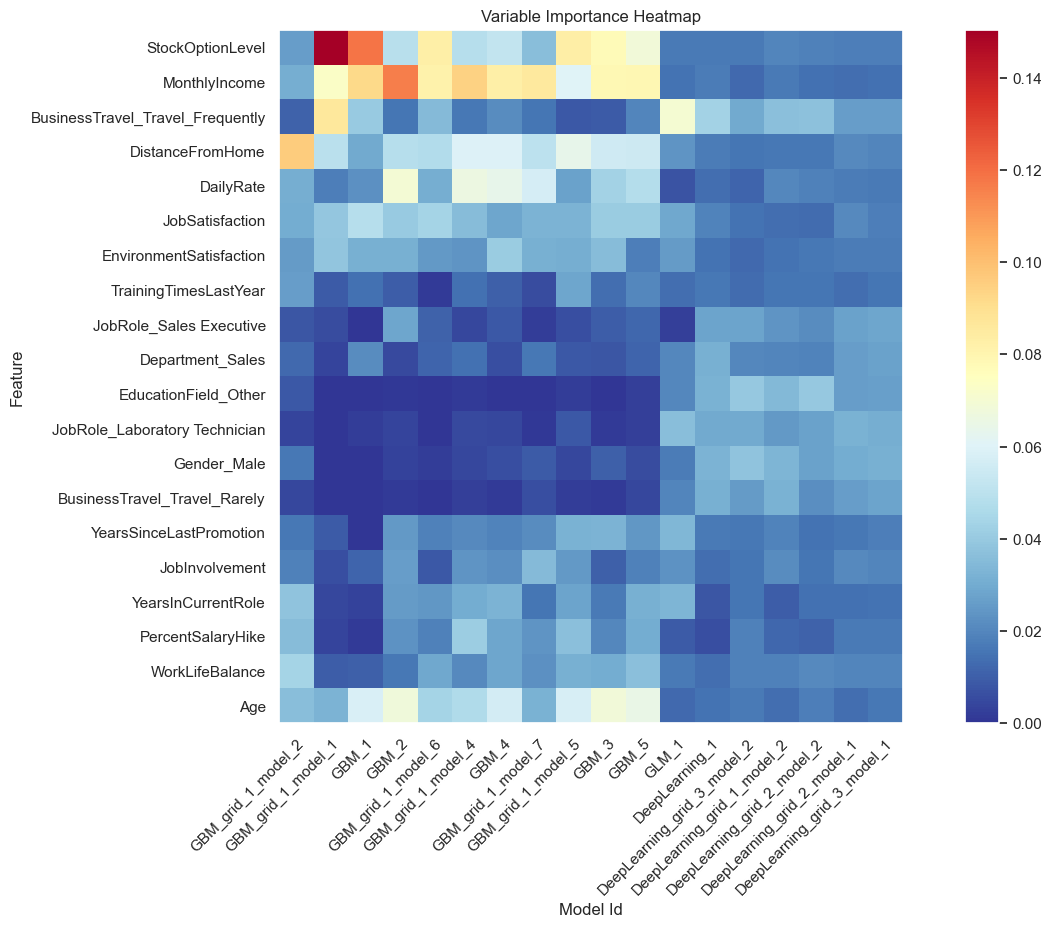

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

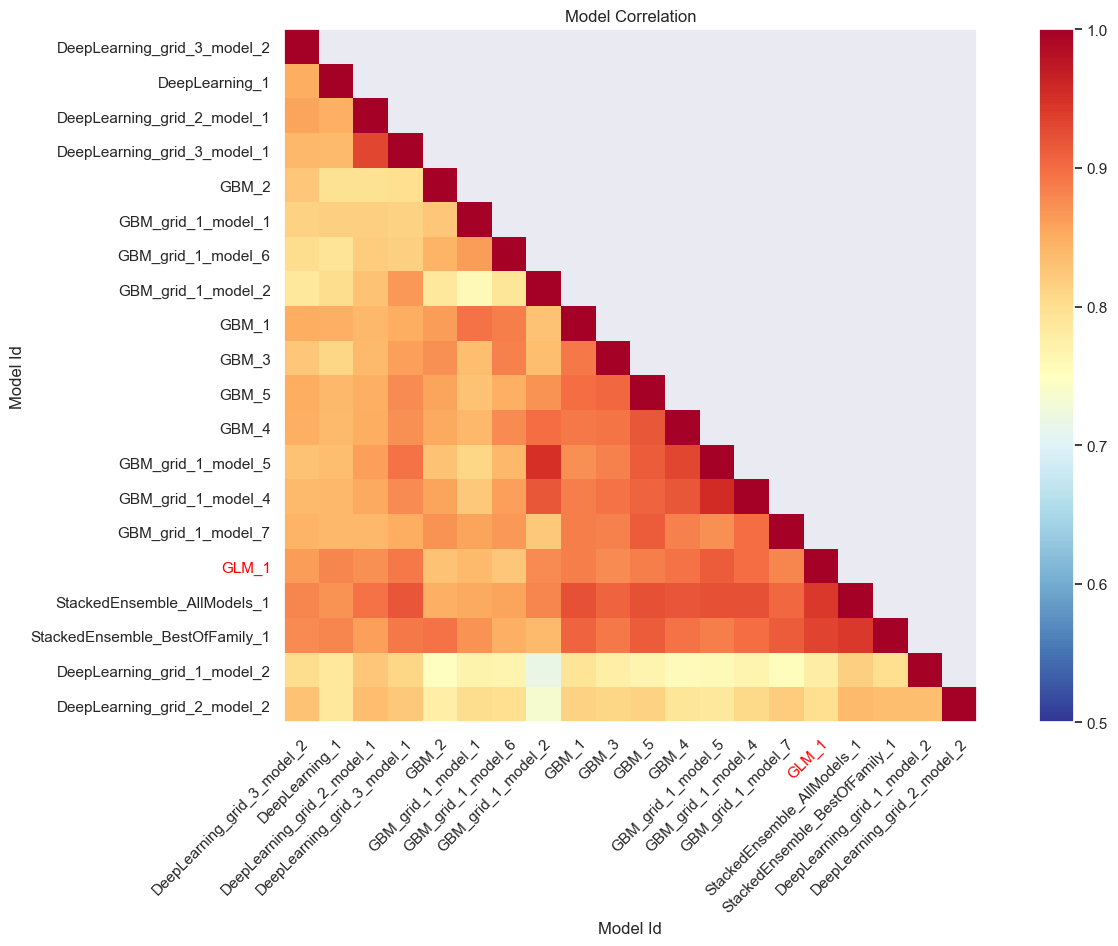

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

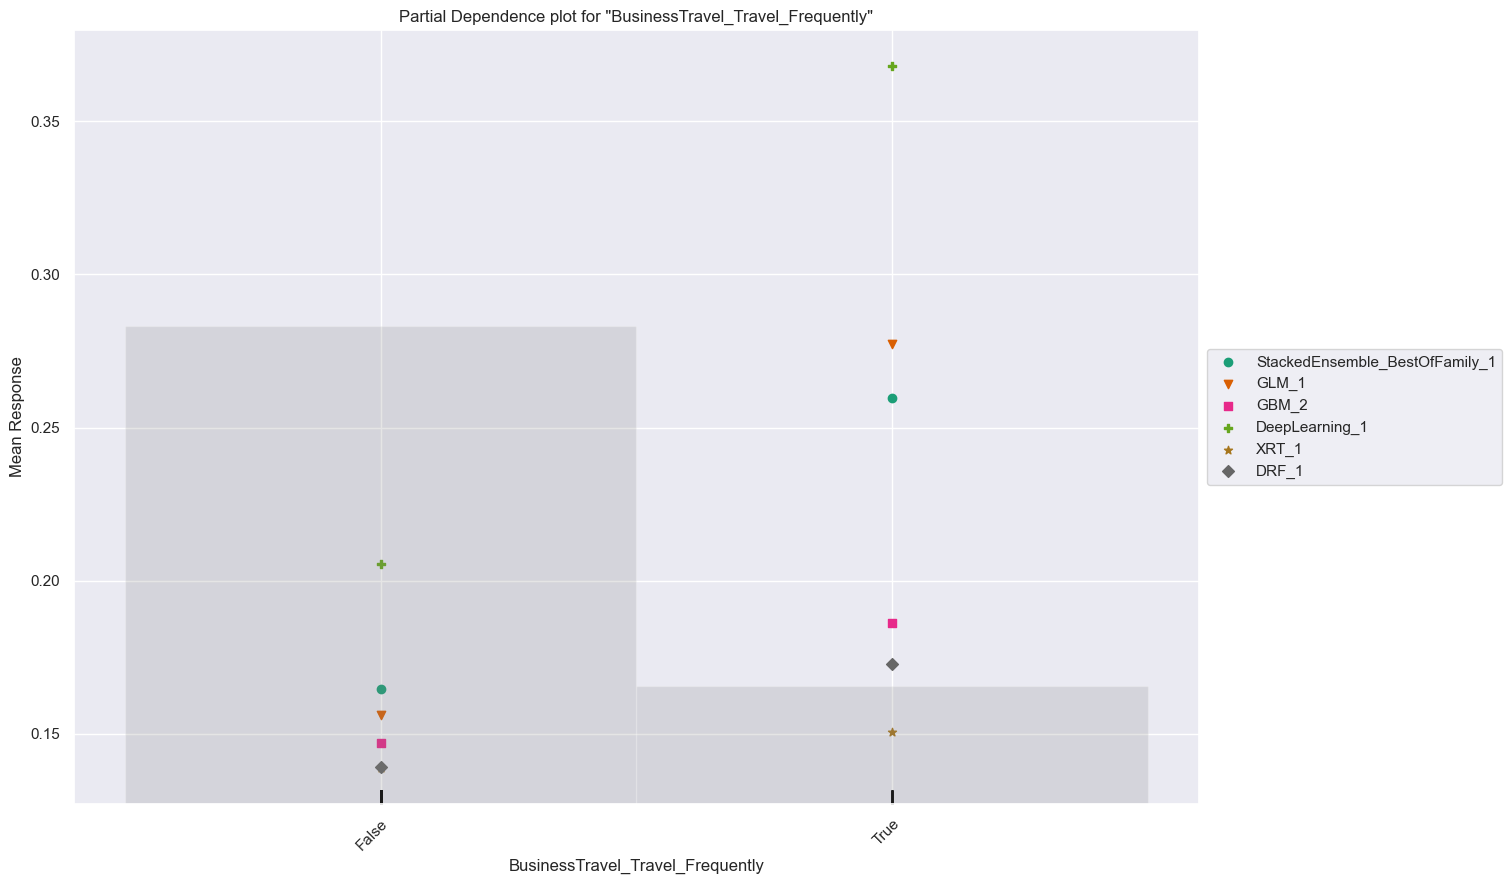

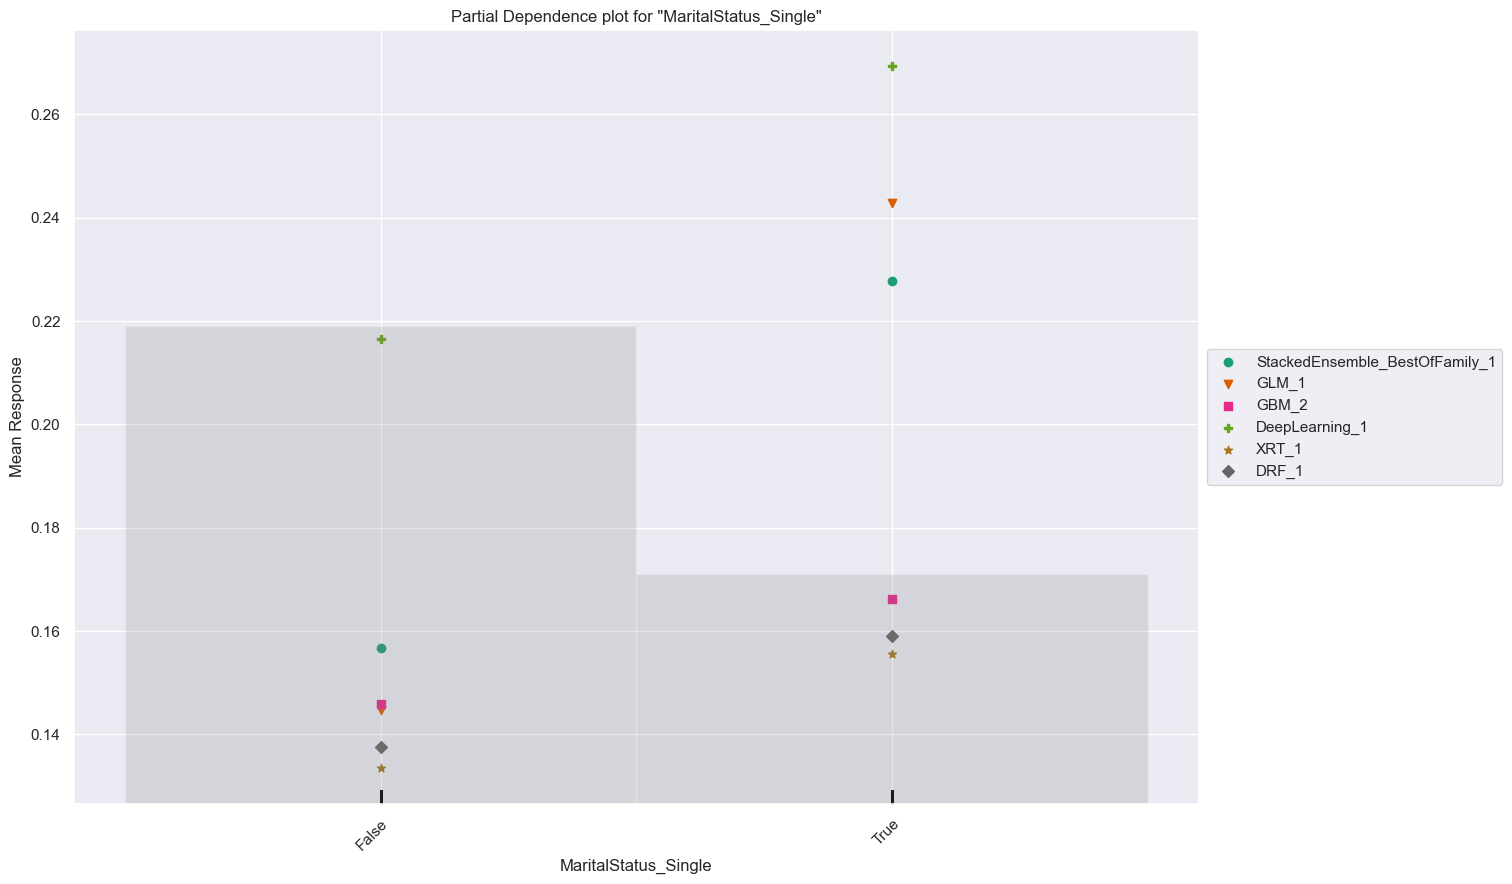

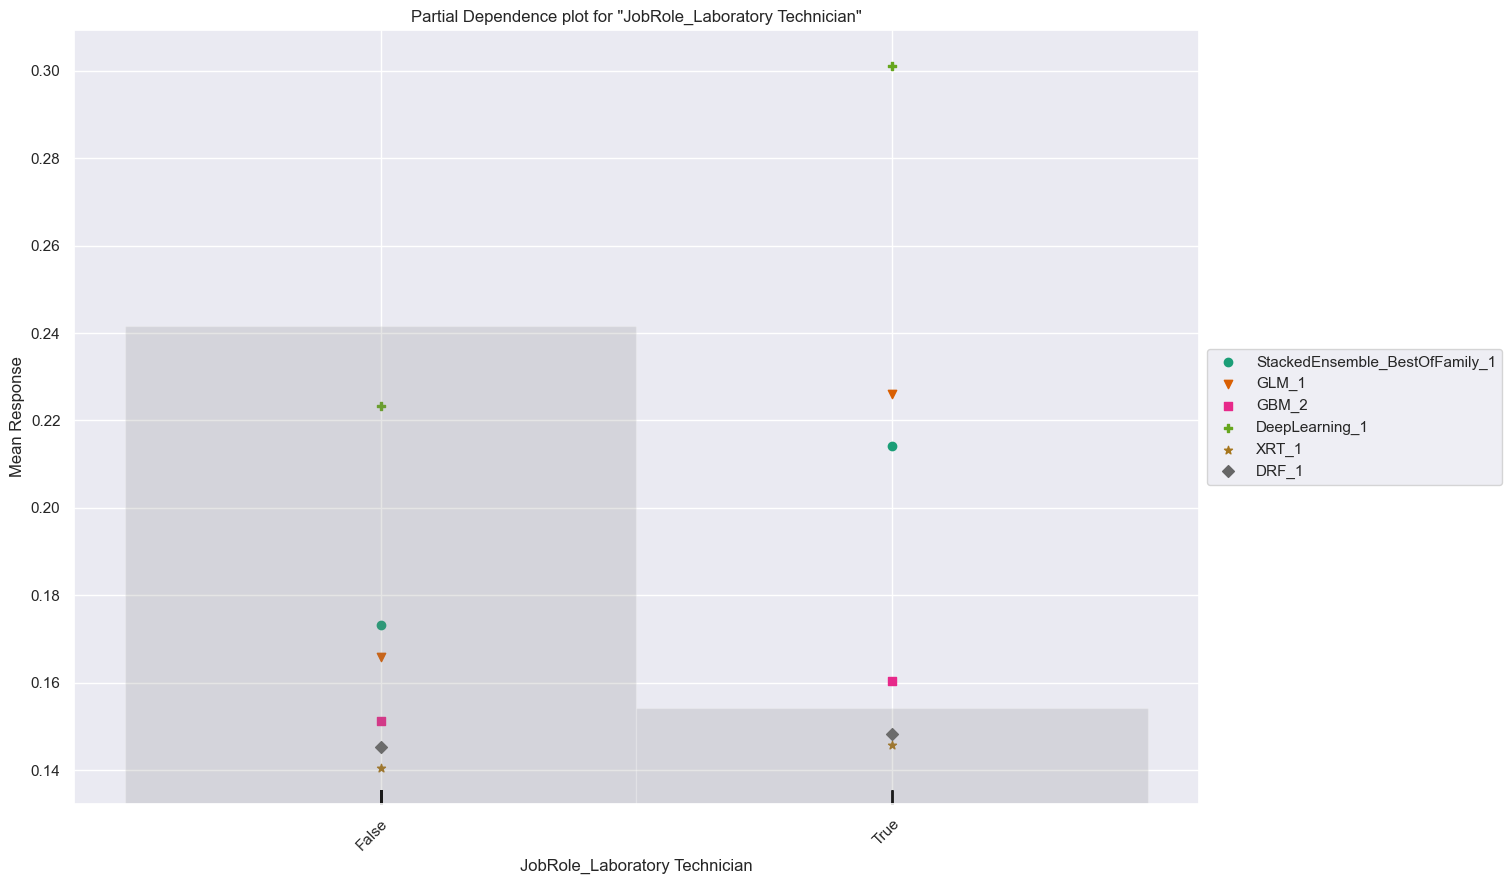

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956  0.856772   0.294192  0.604992                0.207059  0.294138  0.0865169                1097                   0.025756  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240415_121956     0.843895   0.299999  0.584381                0.247128  0.299658  0.0897948                1548                   0.072728  StackedEnsemble
GBM_3_AutoML_1_20240415_121956                           0.841486   0.29803   0.572681                0.252965  0.298238  0.0889459                 155                   0.016582  GBM
GLM_1_AutoML_1_20240415_121956                           0.839726   0.307927  0.562022                0.285251  0.299689  0.0898134                 147                   0.01055   GLM
GBM_5_AutoML_1_20240415_121956                           0.837966   0.307437  0.51281                 0.224801  0.305906  0.0935783                 133                   0.01707   GBM
GBM_grid_1_AutoML_1_20240415_121956_model_5              0.835927   0.327351  0.552024                0.209005  0.301988  0.0911965                 486                   0.025744  GBM
GBM_2_AutoML_1_20240415_121956                           0.835279   0.298917  0.570401                0.234992  0.29807   0.0888458                 183                   0.014827  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_6              0.834445   0.309471  0.556373                0.277006  0.30144   0.0908662                  83                   0.01478   GBM
GBM_grid_1_AutoML_1_20240415_121956_model_7              0.830554   0.310304  0.539804                0.317074  0.303202  0.0919317                  86                   0.014709  GBM
GBM_1_AutoML_1_20240415_121956                           0.829072   0.314094  0.579394                0.236937  0.301627  0.0909787                 233                   0.015001  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_2              0.828331   0.346509  0.477041                0.266815  0.319806  0.102276                  295                   0.022815  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_4              0.819344   0.310612  0.529634                0.246896  0.303009  0.0918143                 181                   0.018846  GBM
GBM_4_AutoML_1_20240415_121956                           0.814249   0.321036  0.480813                0.268529  0.311379  0.0969566                 247                   0.016483  GBM
GBM_grid_1_AutoML_1_20240415_121956_model_1              0.814249   0.326341  0.552826                0.226283  0.30878   0.0953451                 107                   0.012931  GBM
DeepLearning_grid_1_AutoML_1_20240415_121956_model_3     0.797943   1.16777   0.52274                 0.27506   0.405577  0.164493                  709                   0.021974  DeepLearning
GBM_grid_1_AutoML_1_20240415_121956_model_3              0.796554   0.36098   0.440532                0.298638  0.323666  0.10476                   316                   0.018672  GBM
XRT_1_AutoML_1_20240415_121956                           0.793728   0.345597  0.442514                0.32657   0.320713  0.102857                  200                   0.018895  DRF
DeepLearning_1_AutoML_1_20240415_121956                  0.793682   0.39459   0.496699                0.246665  0.347121  0.120493                  144                   0.013576  DeepLearning
DeepLearning_grid_1_AutoML_1_20240415_121956_model_2     0.790995   0.757195  0.519271                0.302992  0.395527  0.156442                 4199                   0.013547  DeepLearning
DeepLearning_grid_2_AutoML_1_20240415_121956_model_3     0.788864   1.75

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27136144852032934
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  224      33      0.1284   (33.0/257.0)
True   12       30      0.2857   (12.0/42.0)
Total  236      63      0.1505   (45.0/299.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

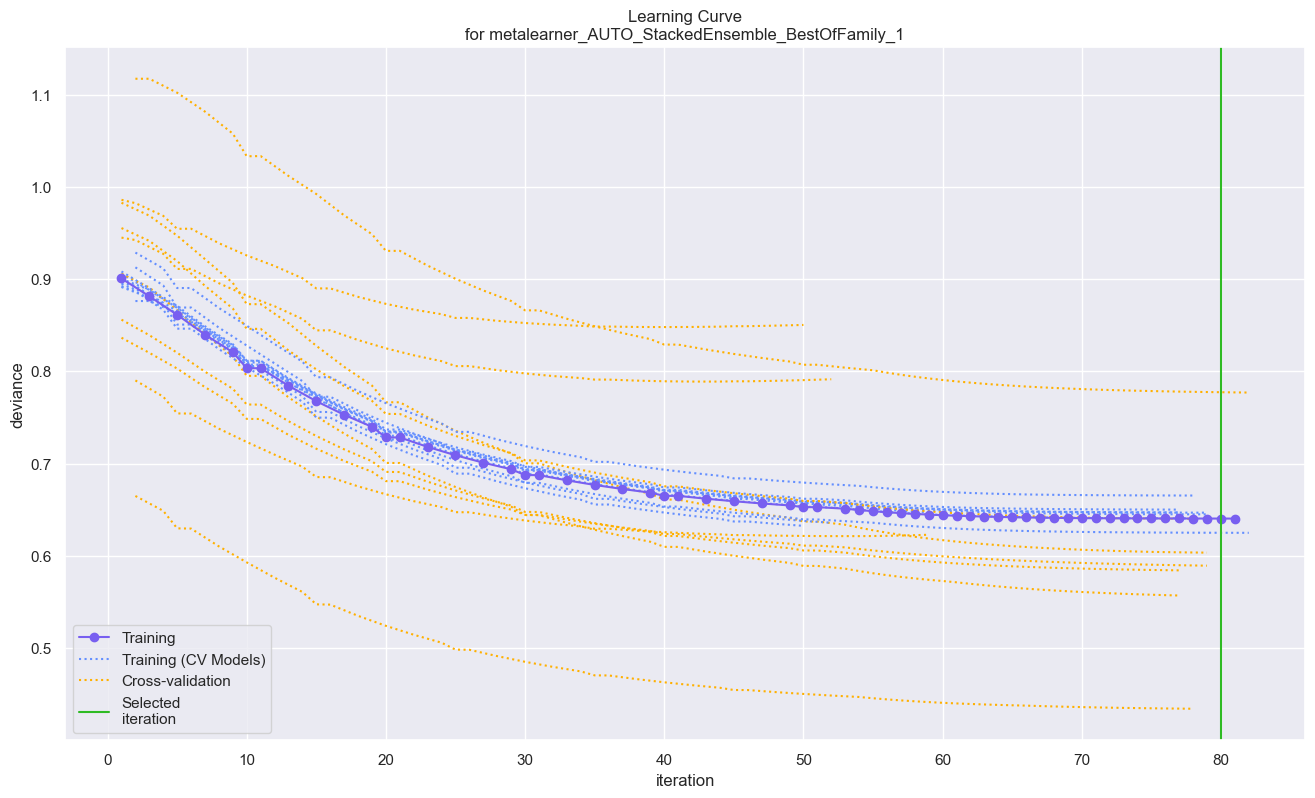

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

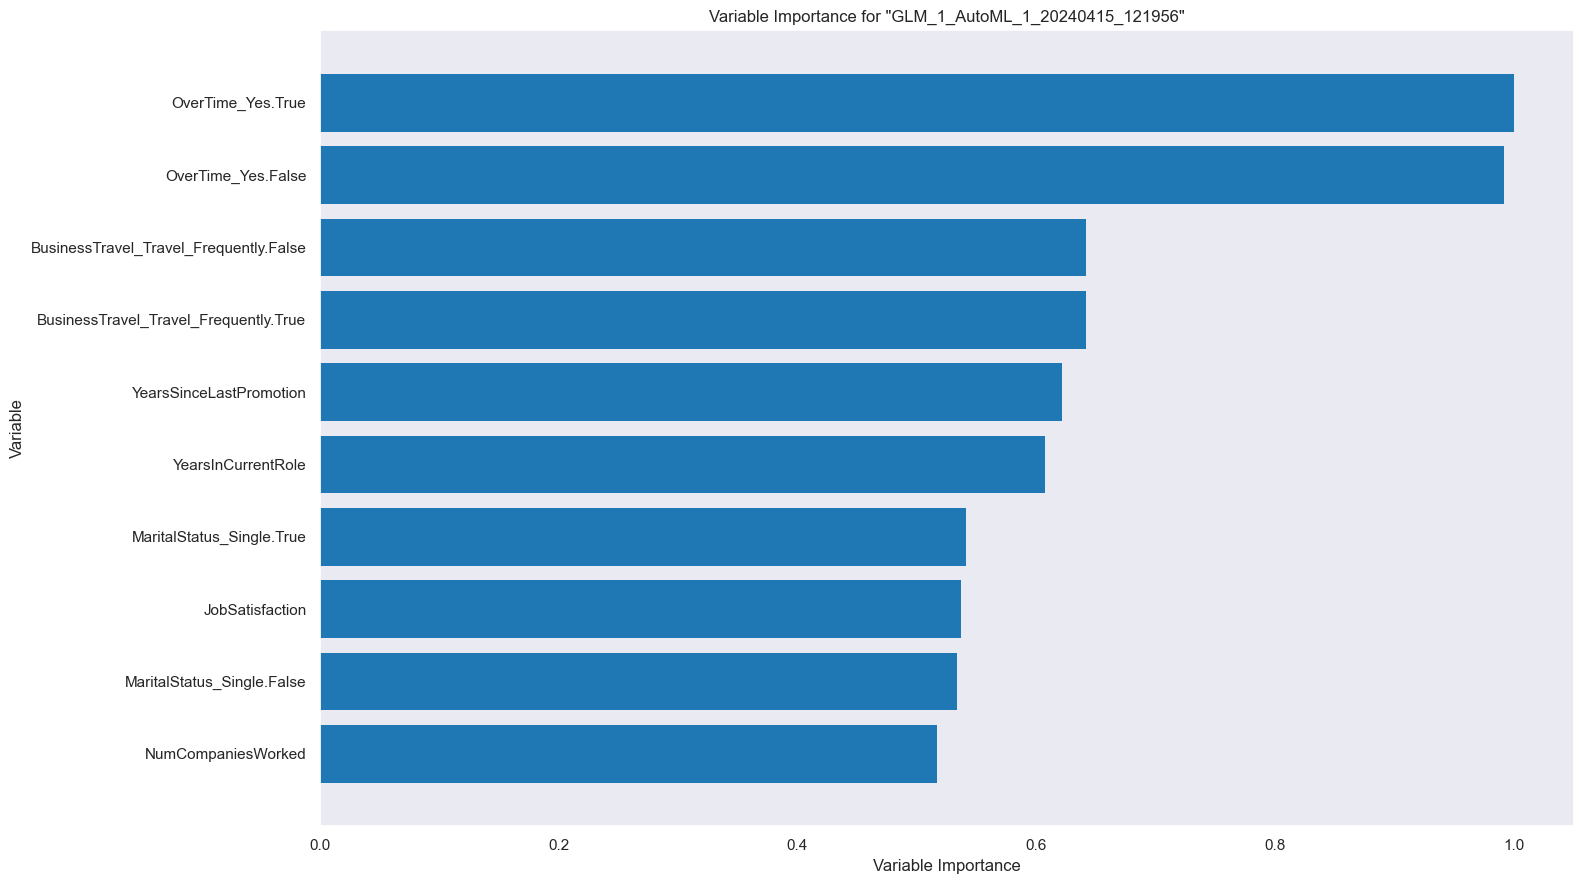

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

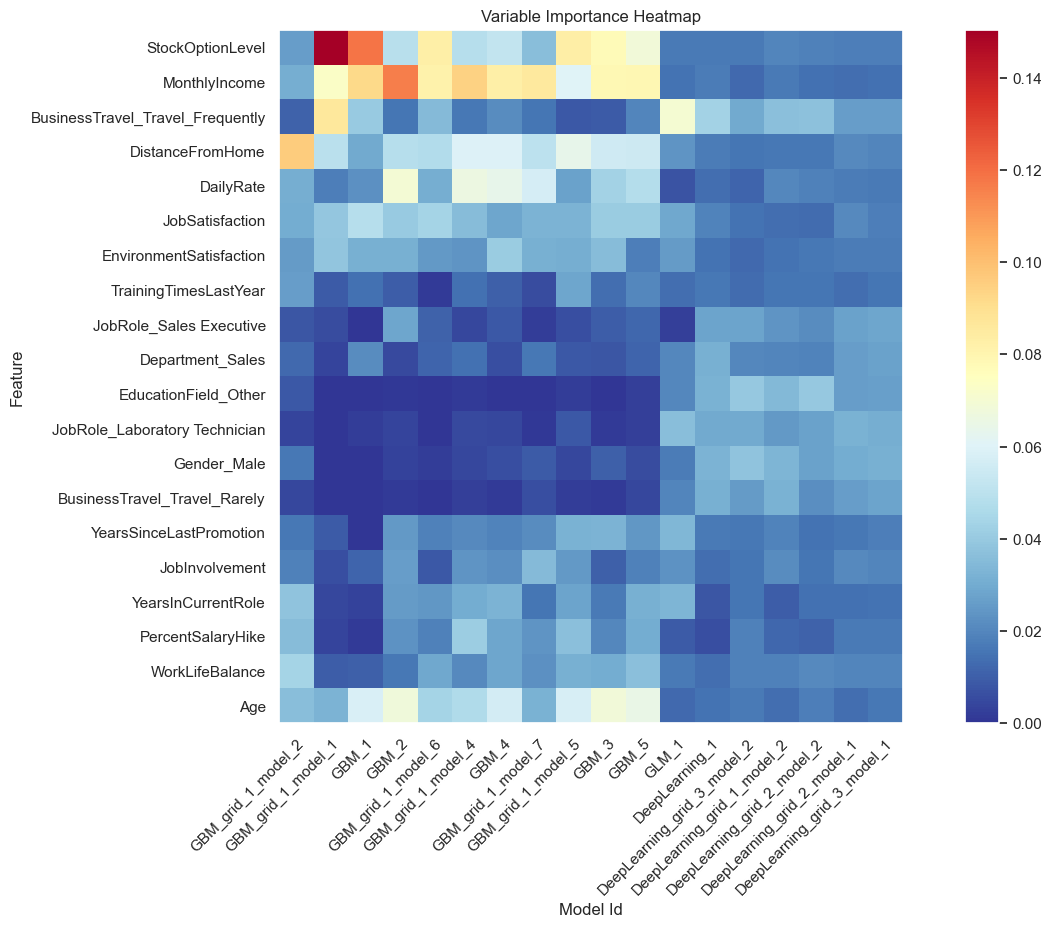

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

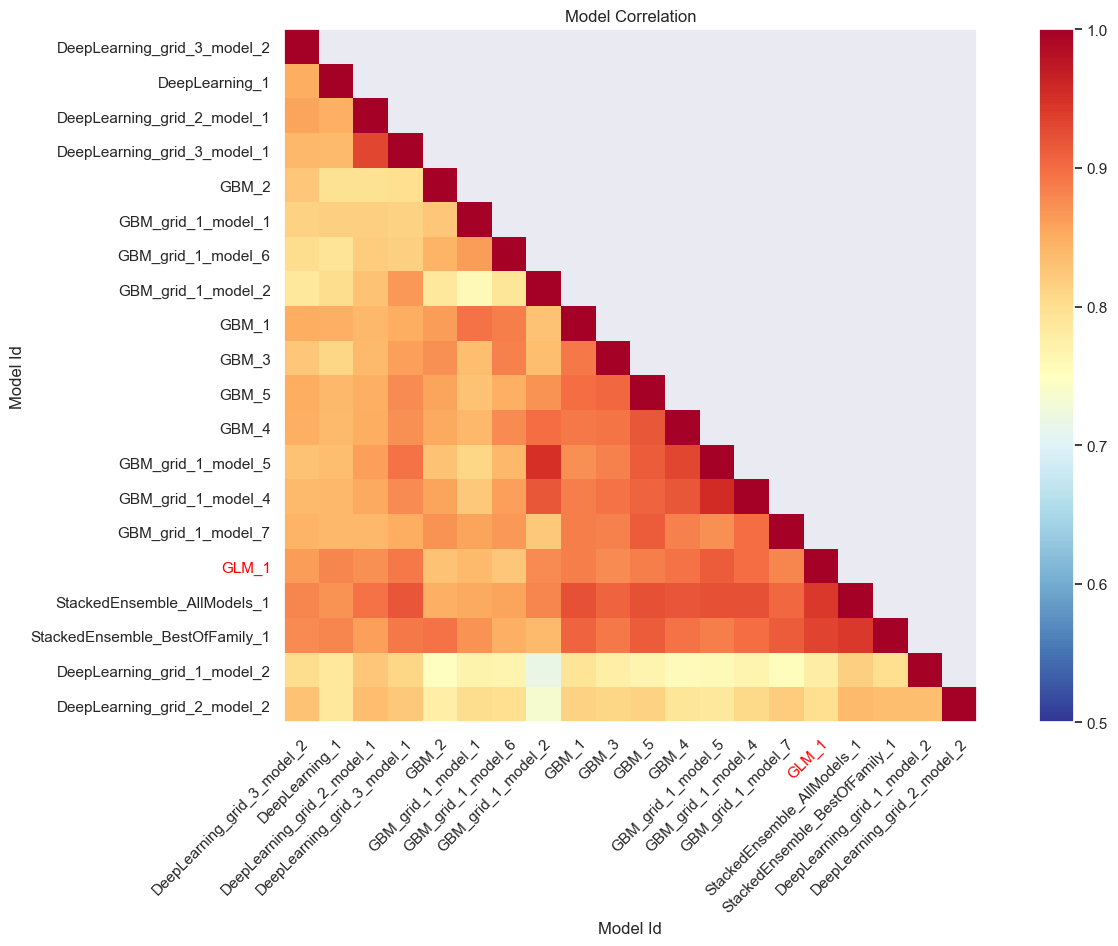

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

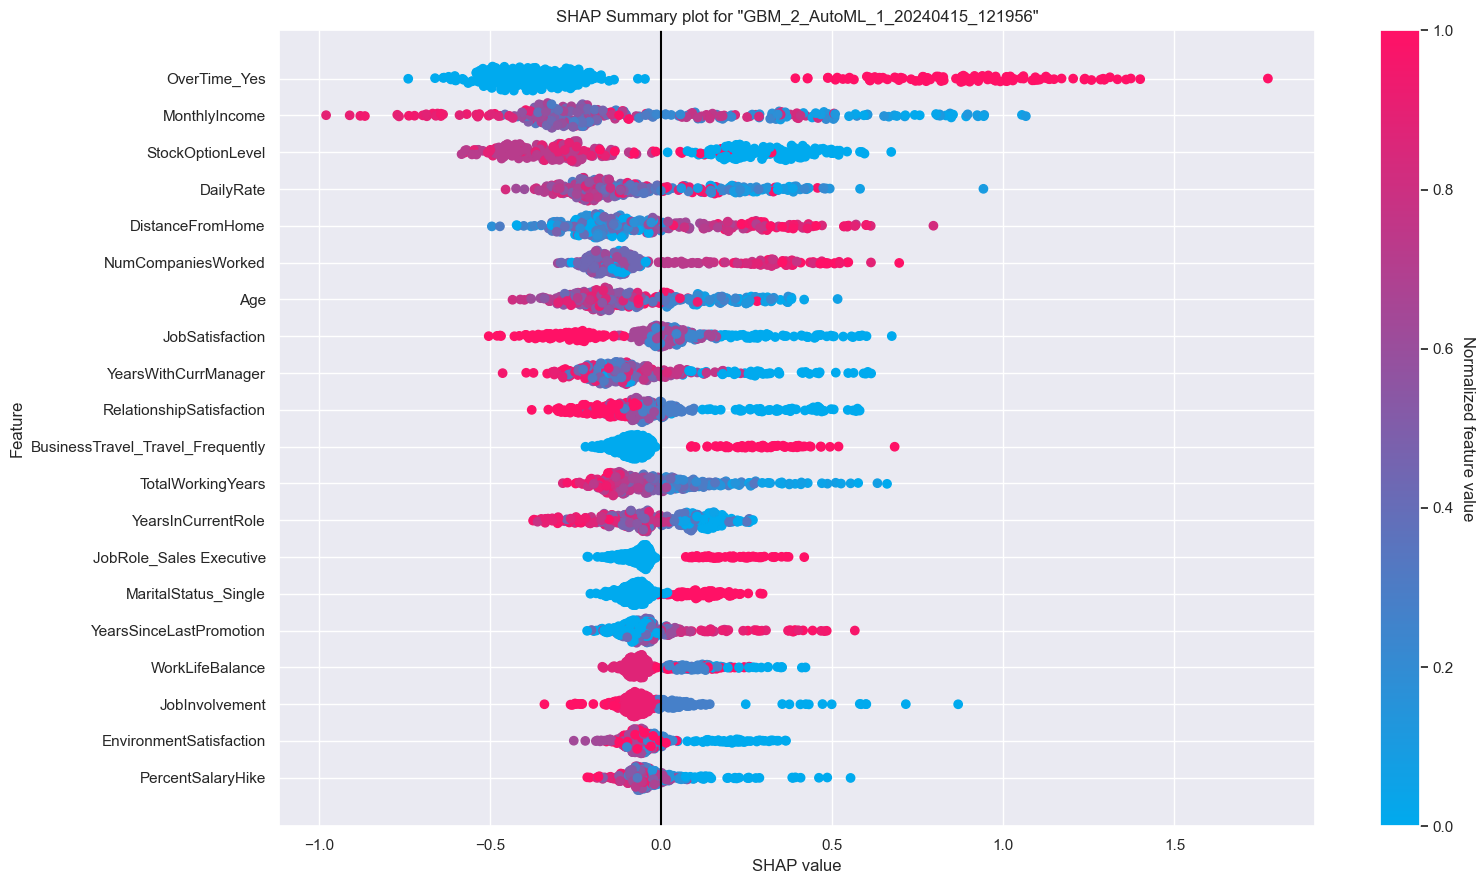

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

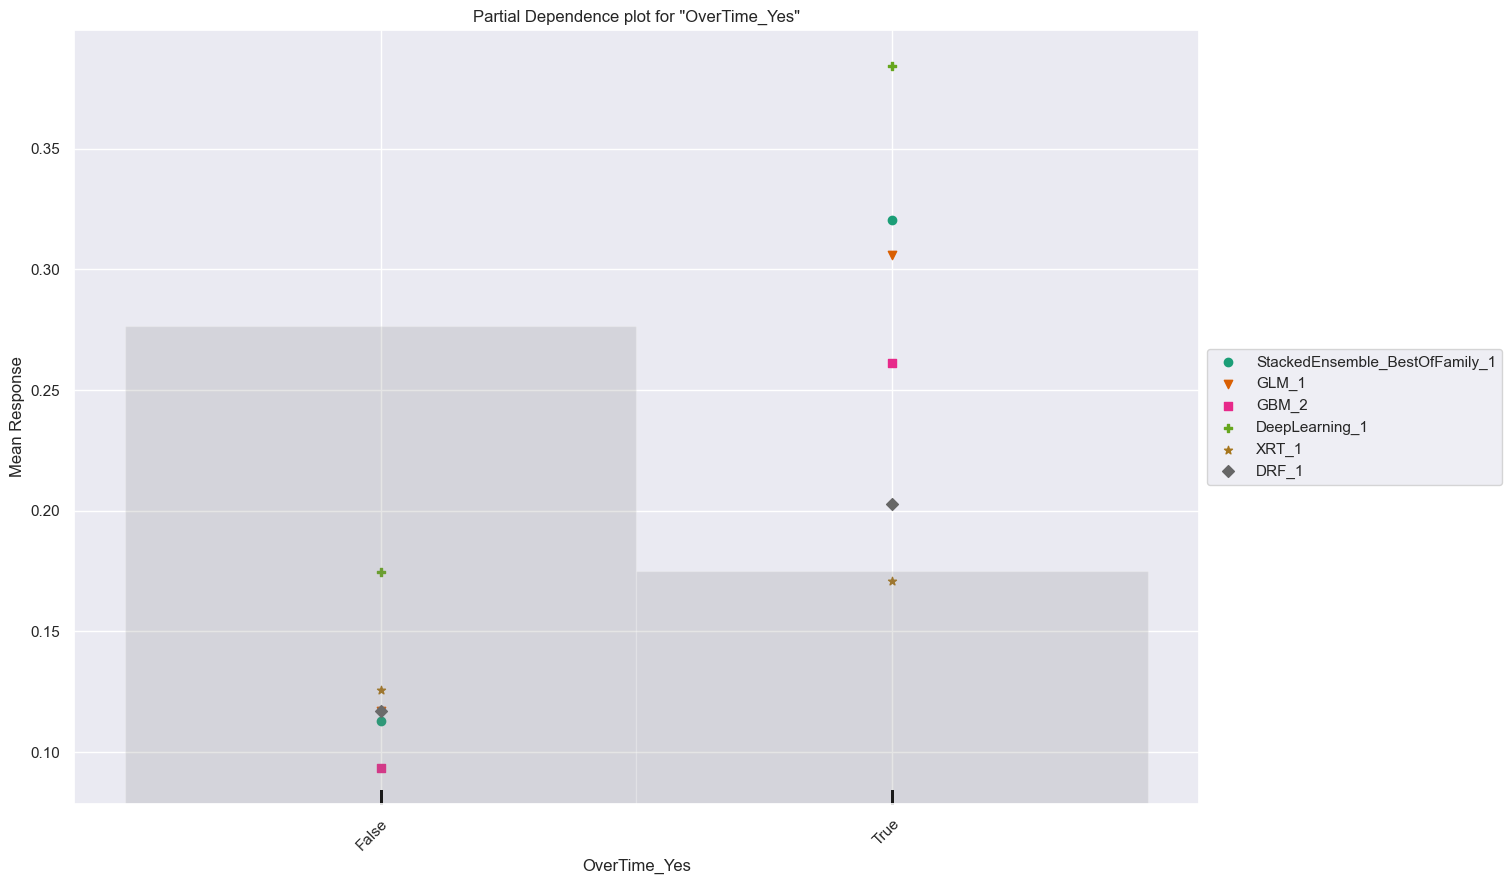

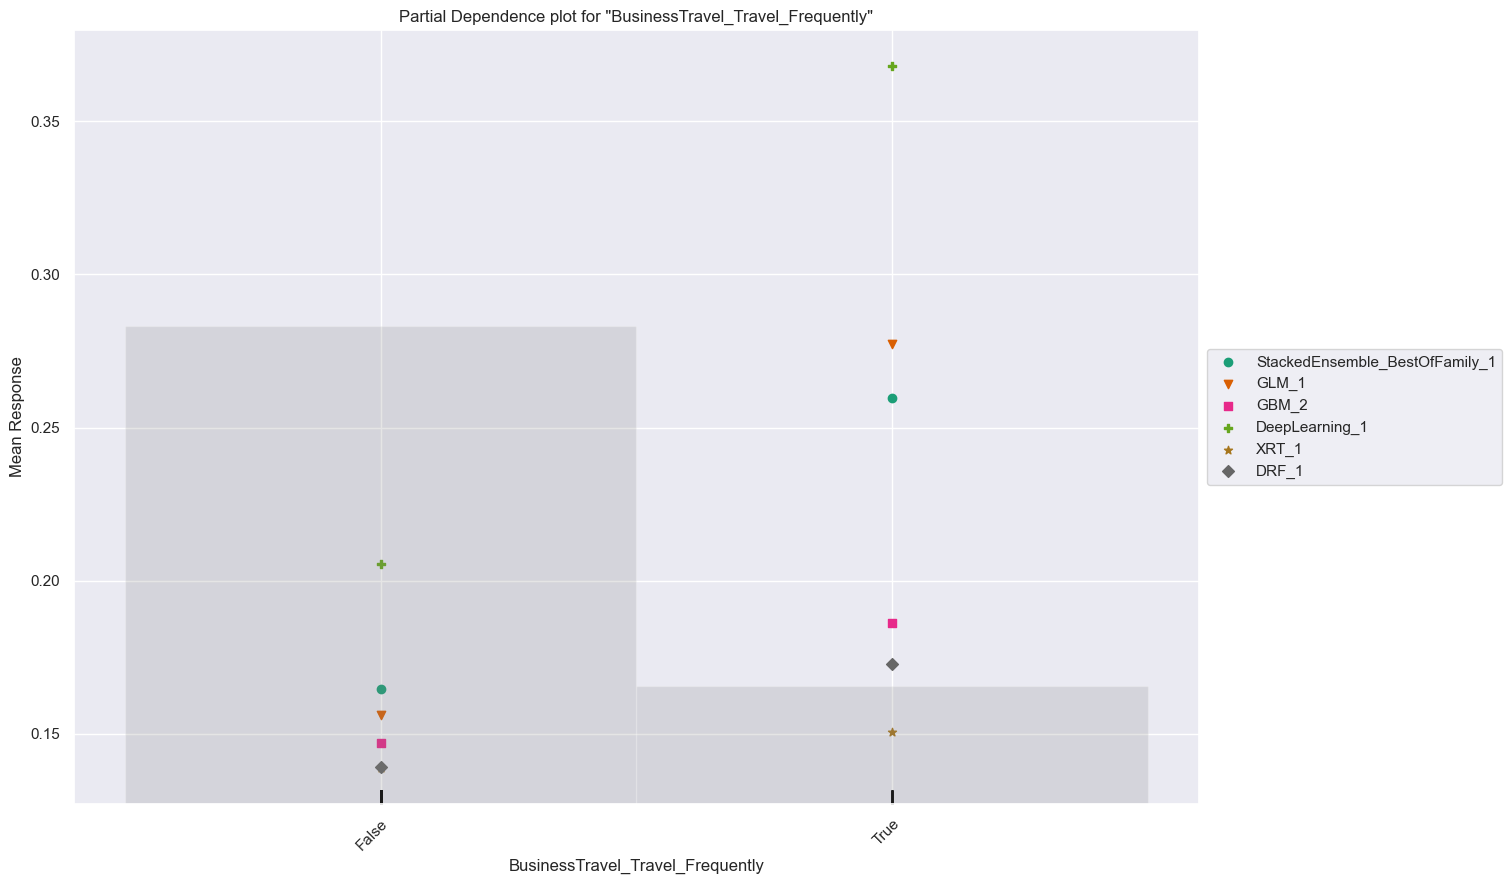

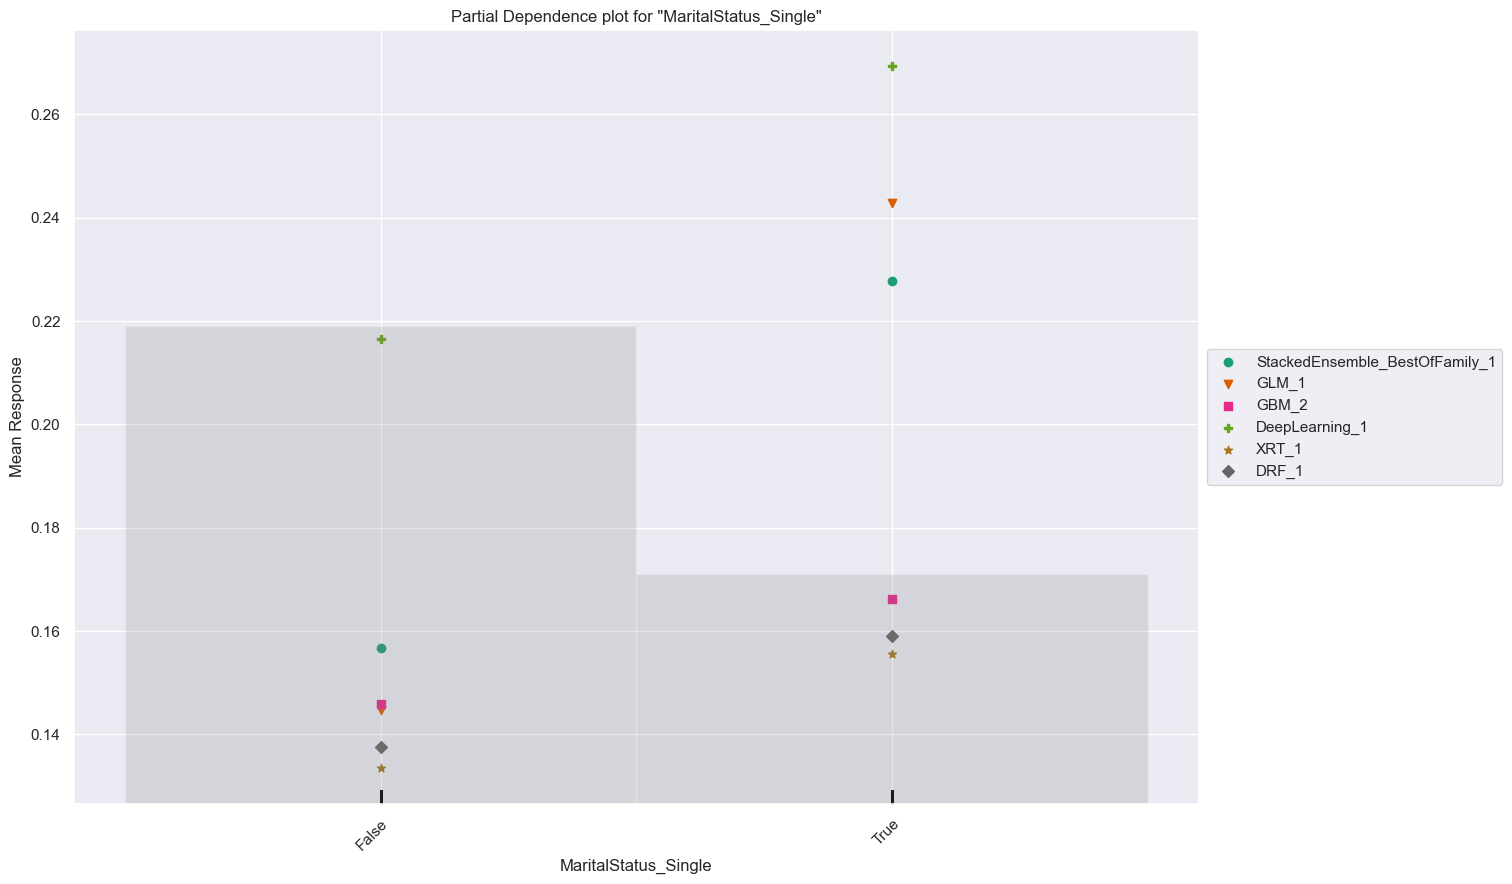

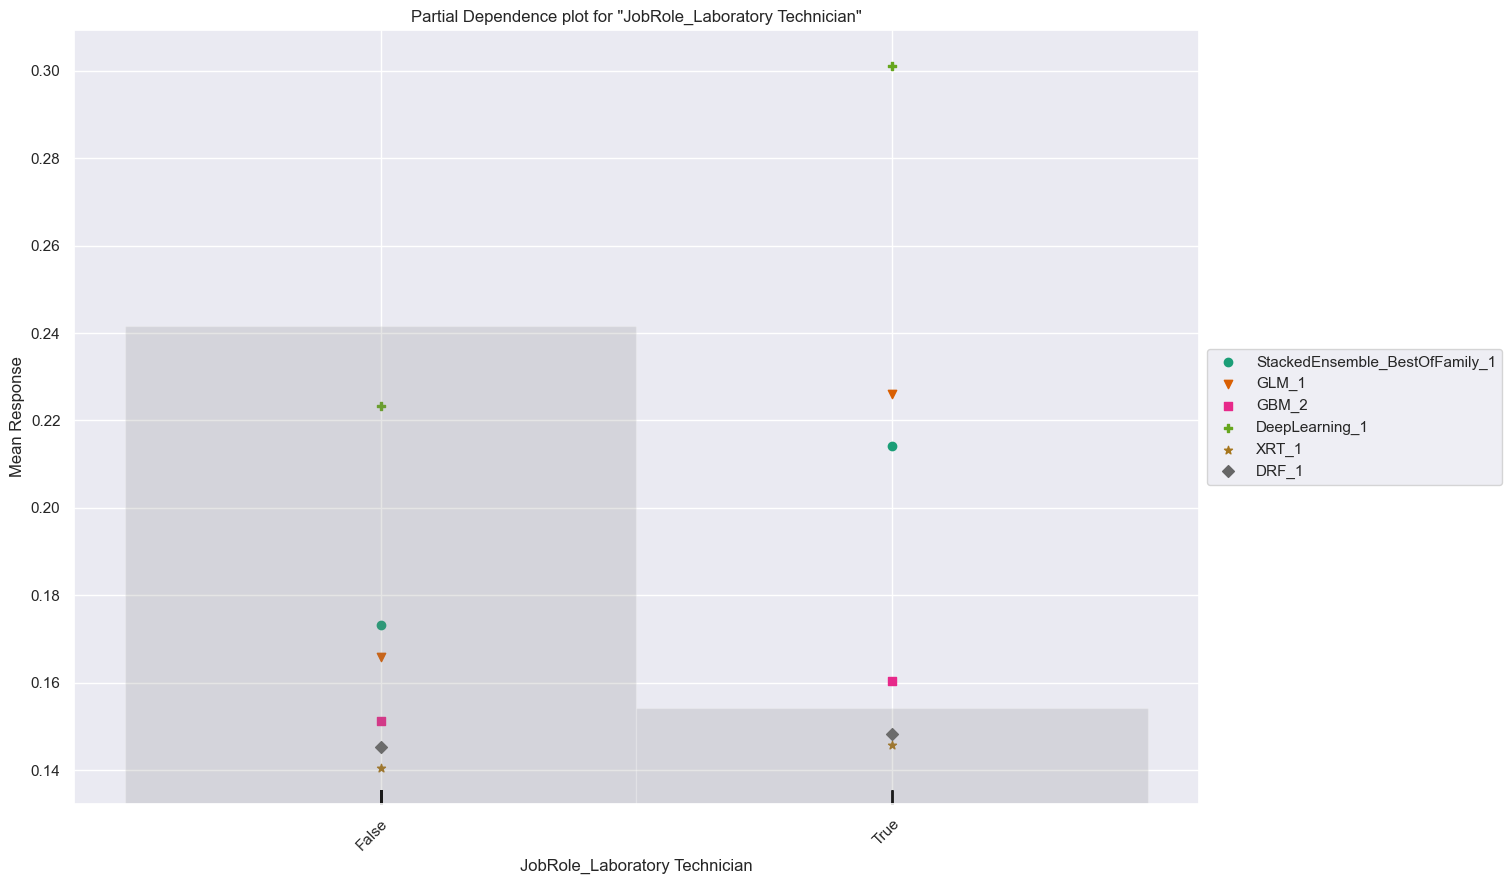

In [141]:
aml.explain(test_h)

In [142]:
# Example for the chosen model
aml.varimp(use_pandas = True)

GBM_grid_1_model_1     GBM_1  \
DailyRate                                   0.017861  0.022612   
Age                                         0.032643  0.058391   
DistanceFromHome                            0.049847  0.029567   
MaritalStatus_Single                        0.028962  0.008660   
MonthlyRate                                 0.005264  0.027936   
JobSatisfaction                             0.038918  0.048527   
JobLevel                                    0.023772  0.045631   
TrainingTimesLastYear                       0.008837  0.014458   
Department_Sales                            0.003684  0.021738   
JobRole_Research Scientist                  0.000000  0.000000   
JobRole_Human Resources                     0.000000  0.000000   
EducationField_Other                        0.000000  0.000000   
BusinessTravel_Travel_Rarely                0.000000  0.000000   
YearsSinceLastPromotion                     0.009354  0.000000   
WorkLifeBalance                             0.009784  0.010081   
RelationshipSatisfaction                    0.004716  0.010150   
HourlyRate                                  0.015751  0.000000   
YearsInCurrentRole                          0.004565  0.003519   
PercentSalaryHike                           0.003862  0.001704   
BusinessTravel_Travel_Frequently            0.086197  0.040529   

                                  GBM_grid_1_model_3  GBM_grid_1_model_2  \
DailyRate                                   0.068592            0.030871   
Age                                         0.066708            0.035910   
DistanceFromHome                            0.020196            0.096380   
MaritalStatus_Single                        0.005068            0.007585   
MonthlyRate                                 0.029516            0.060357   
JobSatisfaction                             0.018193            0.030035   
JobLevel                                    0.028374            0.033076   
TrainingTimesLastYear                       0.007142            0.026294   
Department_Sales                            0.006664            0.012722   
JobRole_Research Scientist                  0.010617            0.008885   
JobRole_Human Resources                     0.004238            0.002377   
EducationField_Other                        0.002534            0.008390   
BusinessTravel_Travel_Rarely                0.011488            0.004498   
YearsSinceLastPromotion                     0.038419            0.016092   
WorkLifeBalance                             0.021380            0.043878   
RelationshipSatisfaction                    0.018775            0.027178   
HourlyRate                                  0.053504            0.044684   
YearsInCurrentRole                          0.018772            0.037805   
PercentSalaryHike                           0.035922            0.035688   
BusinessTravel_Travel_Frequently            0.014499            0.011113   

                                  GBM_grid_1_model_6  GBM_grid_1_model_7  \
DailyRate                                   0.030698            0.057429   
Age                                         0.044016            0.031748   
DistanceFromHome                            0.047397            0.050504   
MaritalStatus_Single                        0.024874            0.040612   
MonthlyRate                                 0.031866            0.029836   
JobSatisfaction                             0.044053            0.032855   
JobLevel                                    0.030327            0.032846   
TrainingTimesLastYear                       0.001679            0.005466   
Department_Sales                            0.011427            0.016144   
JobRole_Research Scientist                  0.000000            0.008769   
JobRole_Human Resources                     0.000000            0.000000   
EducationField_Other                        0.000000            0.000000   
BusinessTravel_Travel_Rarely                0.000000          

### Over Time, Business Travel Frequently, Years since last promotion and  Years in Current role are the first 4 reasons of attrition for employee in this dataset

## Using SHAP Explanation

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict       False        True
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------  ---------  --------  ----------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956  0.856772   0.294192  0.604992                0.207059  0.294138  0.0865169                1097                   0.025756  StackedEnsemble  False      0.833951  0.166049
StackedEnsemble_AllModels_1_AutoML_1_20240415_121956     0.843895   0.299999  0.584381                0.247128  0.299658  0.0897948                1548                   0.072728  StackedEnsemble  False      0.807564  0.192436
GBM_3_AutoML_1_20240415_121956                           0.841486   0.29803   0.572681                0.252965  0.298238  0.0889459                 155                   0.016582  GBM              False      0.959705  0.0402948
GLM_1_AutoML_1_20240415_121956                           0.839726   0.307927  0.562022                0.285251  0.299689  0.0898134                 147                   0.01055   GLM              False      0.910239  0.0897607
GBM_5_AutoML_1_20240415_121956                           0.837966   0.307437  0.51281                 0.224801  0.305906  0.0935783                 133                   0.01707   GBM              False      0.935084  0.0649156
GBM_grid_1_AutoML_1_20240415_121956_model_5              0.835927   0.327351  0.552024                0.209005  0.301988  0.0911965                 486                   0.025744  GBM              False      0.992733  0.00726748
GBM_2_AutoML_1_20240415_121956                           0.835279   0.298917  0.570401                0.234992  0.29807   0.0888458                 183                   0.014827  GBM              True       0.744175  0.255825
GBM_grid_1_AutoML_1_20240415_121956_model_6              0.834445   0.309471  0.556373                0.277006  0.30144   0.0908662                  83                   0.01478   GBM              False      0.897406  0.102594
GBM_grid_1_AutoML_1_20240415_121956_model_7              0.830554   0.310304  0.539804                0.317074  0.303202  0.0919317                  86                   0.014709  GBM              False      0.924542  0.0754585
GBM_1_AutoML_1_20240415_121956                           0.829072   0.314094  0.579394                0.236937  0.301627  0.0909787                 233                   0.015001  GBM              False      0.80794   0.19206
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

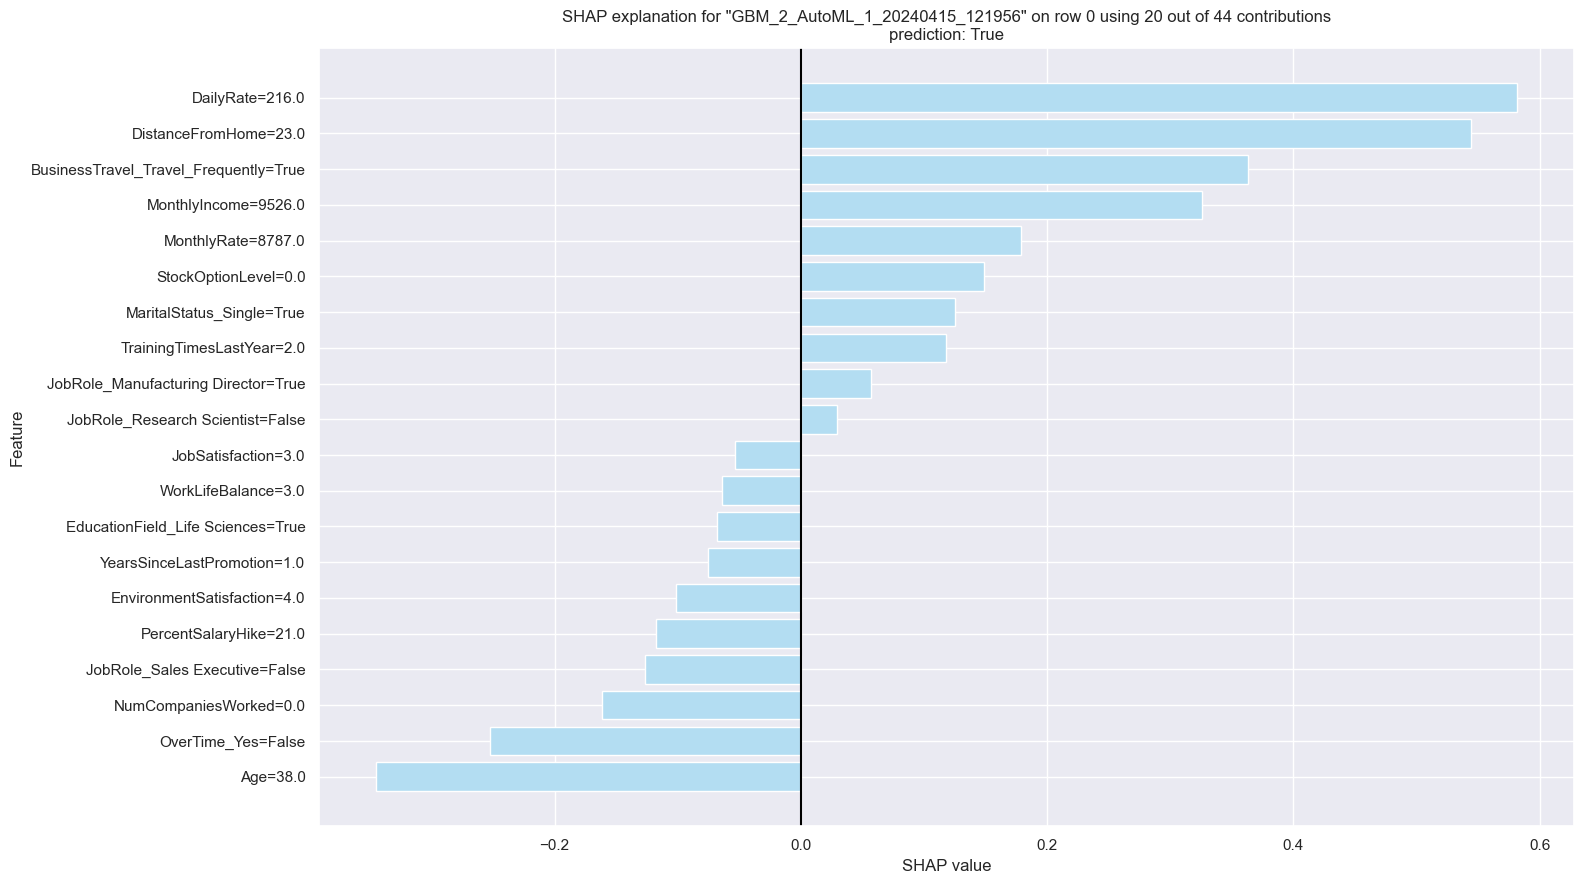

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict       False        True
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------  ---------  --------  ----------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240415_121956  0.856772   0.294192  0.604992                0.207059  0.294138  0.0865169                1097                   0.025756  StackedEnsemble  False      0.833951  0.166049
StackedEnsemble_AllModels_1_AutoML_1_20240415_121956     0.843895   0.299999  0.584381                0.247128  0.299658  0.0897948                1548                   0.072728  StackedEnsemble  False      0.807564  0.192436
GBM_3_AutoML_1_20240415_121956                           0.841486   0.29803   0.572681                0.252965  0.298238  0.0889459                 155                   0.016582  GBM              False      0.959705  0.0402948
GLM_1_AutoML_1_20240415_121956                           0.839726   0.307927  0.562022                0.285251  0.299689  0.0898134                 147                   0.01055   GLM              False      0.910239  0.0897607
GBM_5_AutoML_1_20240415_121956                           0.837966   0.307437  0.51281                 0.224801  0.305906  0.0935783                 133                   0.01707   GBM              False      0.935084  0.0649156
GBM_grid_1_AutoML_1_20240415_121956_model_5              0.835927   0.327351  0.552024                0.209005  0.301988  0.0911965                 486                   0.025744  GBM              False      0.992733  0.00726748
GBM_2_AutoML_1_20240415_121956                           0.835279   0.298917  0.570401                0.234992  0.29807   0.0888458                 183                   0.014827  GBM              True       0.744175  0.255825
GBM_grid_1_AutoML_1_20240415_121956_model_6              0.834445   0.309471  0.556373                0.277006  0.30144   0.0908662                  83                   0.01478   GBM              False      0.897406  0.102594
GBM_grid_1_AutoML_1_20240415_121956_model_7              0.830554   0.310304  0.539804                0.317074  0.303202  0.0919317                  86                   0.014709  GBM              False      0.924542  0.0754585
GBM_1_AutoML_1_20240415_121956                           0.829072   0.314094  0.579394                0.236937  0.301627  0.0909787                 233                   0.015001  GBM              False      0.80794   0.19206
[20 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

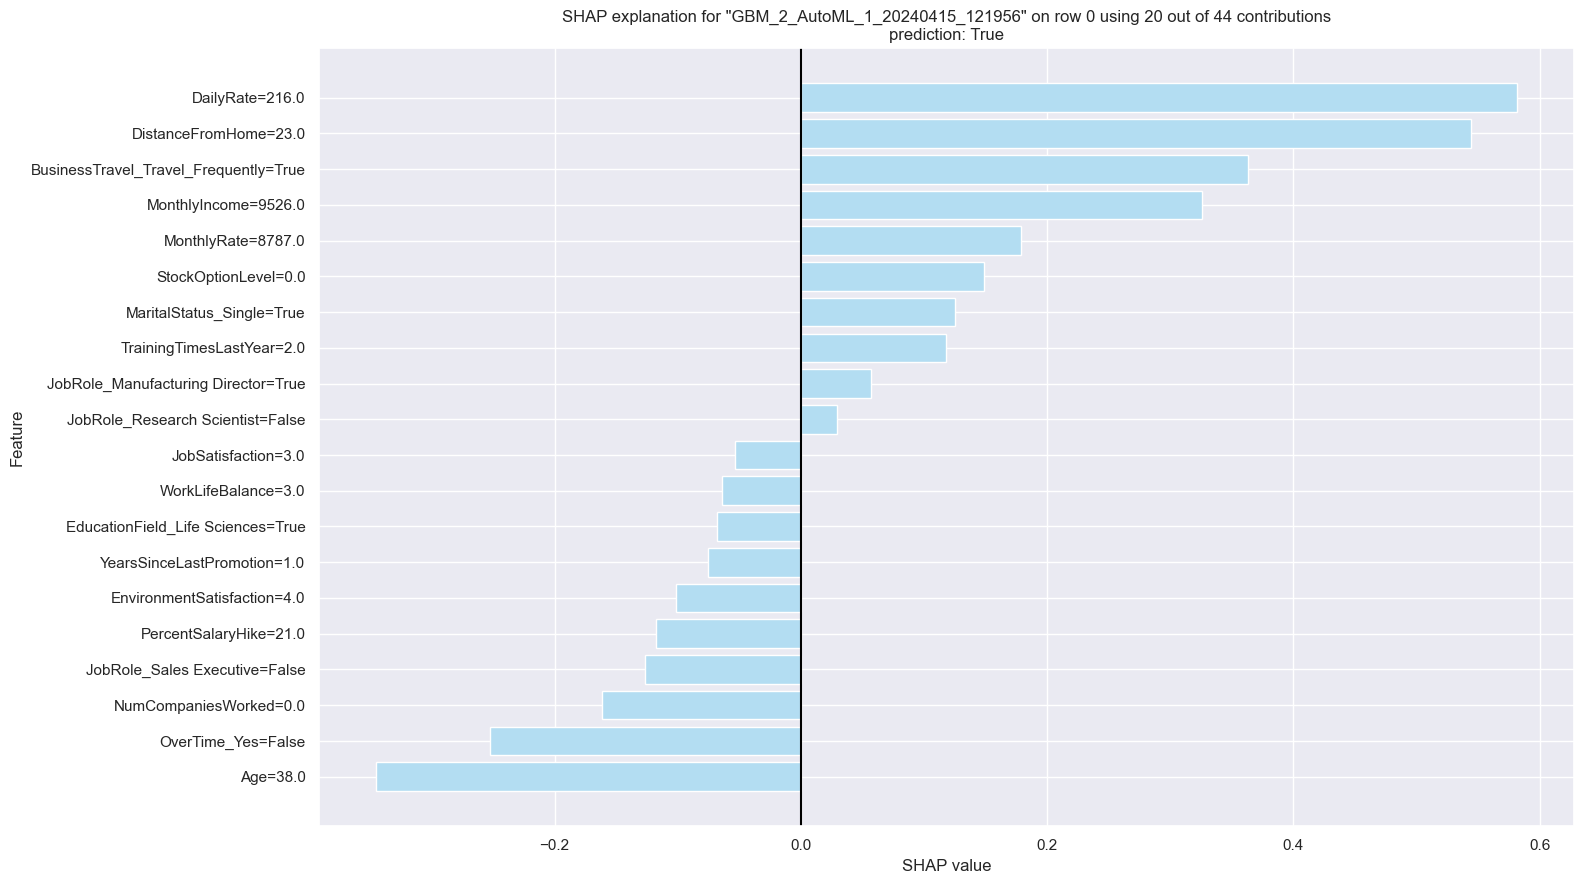

In [144]:
aml.explain_row(test_h, row_index=0) 

In [145]:
# Stop the H20 cluster
h2o.shutdown()

H2O session _sid_a495 closed.


## Reference
    
    
    https://www.kaggle.com/code/paradiselost/tutorial-automl-capabilities-of-h2o-library
    https://medium.com/all-things-ai/automatic-model-selection-h2o-automl-79b3b4696f58
    https://github.com/hyunjoonbok/Python-Projects/blob/master/H2O/Complete%20guide%20to%20Machine%20Learning%20with%20H2O%20(AutoML).ipynb
    https://medium.com/@yashashreepatel/data-cleaning-feature-selection-modeling-and-interpretability-e64777161ac5
    https://h2oai.github.io/tutorials/introduction-to-machine-learning-with-h2o-3-automl/#5
    https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
    https://blog.devgenius.io/h2o-automl-in-python-102d4f8e0289
    https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f
    https://www.analyticsvidhya.com/blog/2021/02/unboxing-h2o-automl-models/
    https://opendatascience.com/a-deep-dive-into-h2os-automl/
    https://medium.com/codex/automate-the-building-of-machine-learning-models-using-automl-h2o-in-python-and-r-so-easy-e864c5621171
    https://ethen8181.github.io/machine-learning/big_data/h2o/h2o_api_walkthrough.html